In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
%matplotlib inline

In [2]:
dados = pd.read_csv("dados_SP_modelo.csv", sep=',', low_memory=False)
dados

,Unnamed: 0,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,0,2020-02-26,1,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
1,1,2020-02-27,2,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
2,2,2020-02-28,3,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
3,3,2020-02-29,4,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
4,4,2020-03-01,5,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,8536,2020-05-07,18,5,3542008,Quintana,Quintana-SP,0,2,0,0,6638,30.10000,0.00000,-22.07300,-50.30800,Tropical,meridiano 50 a 60,N,N,Interior,0.73200,Menor de 10 mil,9,Marília,37,Tupã,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000
8791,8535,2020-05-07,40,5,3550407,São Pedro,São Pedro-SP,9,36,0,0,35653,101.00000,0.00000,-22.54900,-47.91400,Tropical,meridiano 40 a 50,N,N,Interior,0.75500,Maior de 10 mil,6,Piracicaba,28,Piracicaba,12,4,4,2,0,0,22,20,36,8,2,0,0,66,0.53000
8792,8534,2020-05-07,21,5,3503109,Arandu,Arandu-SP,0,10,0,2,6357,157.30000,314.60000,-23.13400,-49.05400,Tropical,meridiano 40 a 50,N,N,Interior,0.68500,Menor de 10 mil,4,Bauru,22,Avaré,0,0,0,0,0,0,0,3,5,4,0,0,0,12,0.53000
8793,8543,2020-05-07,36,5,3500501,Águas de Lindóia,Águas de Lindóia-SP,0,4,0,1,18705,21.40000,53.50000,-22.47600,-46.63300,Tropical,meridiano 40 a 50,N,N,Interior,0.74500,Maior de 10 mil,7,Campinas,33,Amparo,1,7,2,2,0,0,12,3,15,6,6,0,0,30,0.53000


# 1. Feature Engineering

In [3]:
dados2 = dados.drop(columns=['Unnamed: 0', 'cod7d', 'cidade', 'casos_diários', 'mortes_diárias',
                             'casos_por_100mil_hab', 'mortes_por_milhão_hab',
                             'Microrregião Geográfica', 'Nome_Microrregião', 'Mesorregião Geográfica',
                             'Total_Não_SUS', 'Total_SUS'])
dados2

,data,dias_epidemiológicos,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,2020-05-07,18,5,Quintana-SP,2,0,6638,-22.07300,-50.30800,Tropical,meridiano 50 a 60,N,N,Interior,0.73200,Menor de 10 mil,Marília,0,0,0,0,0,0,0,0,0,0,0,0,0.53000
8791,2020-05-07,40,5,São Pedro-SP,36,0,35653,-22.54900,-47.91400,Tropical,meridiano 40 a 50,N,N,Interior,0.75500,Maior de 10 mil,Piracicaba,12,4,4,2,0,0,20,36,8,2,0,0,0.53000
8792,2020-05-07,21,5,Arandu-SP,10,2,6357,-23.13400,-49.05400,Tropical,meridiano 40 a 50,N,N,Interior,0.68500,Menor de 10 mil,Bauru,0,0,0,0,0,0,3,5,4,0,0,0,0.53000
8793,2020-05-07,36,5,Águas de Lindóia-SP,4,1,18705,-22.47600,-46.63300,Tropical,meridiano 40 a 50,N,N,Interior,0.74500,Maior de 10 mil,Campinas,1,7,2,2,0,0,3,15,6,6,0,0,0.53000


Foram excluídas as variáveis cod7d e cidade (ficando apenas com munuf para identificar o município), casos diários e casos por 100 mil habitantes (ficando apenas com casos acumulados), mortes diárias e mortes por milhão de habitantes (ficando apenas com casos acumulados), os totais de leitos SUS e Não SUS, o código da microrregião geográfica e seu nome (pois tem alta correlação com mesorregião geográfica e já temos o município como dado mais granular) e o código da mesorregião geográfica (ficando apenas com o nome da mesorregião).

In [4]:
dados2.isnull().sum()

data                             0
dias_epidemiológicos             0
mês                              0
munuf                            0
casos_acumulados                 0
mortes_acumuladas                0
habitantes                       0
lat                              0
lon                              0
zona geográfica                  0
faixa meridional                 0
capital                          0
litoral                          0
papel                            0
idhm_2010                        0
faixa_pop                        0
Nome_Mesorregião                 0
Cirúrgicos_Não_SUS               0
Clínicos_Não_SUS                 0
Obstétrico_Não_SUS               0
Pediátrico_Não_SUS               0
Outras_Especialidades_Não_SUS    0
Hospital/DIA_Não_SUS             0
Cirúrgicos_SUS                   0
Clínicos_SUS                     0
Obstétrico_SUS                   0
Pediátrico_SUS                   0
Outras_Especialidades_SUS        0
Hospital/DIA_SUS    

In [5]:
dados2.dtypes

data                              object
dias_epidemiológicos               int64
mês                                int64
munuf                             object
casos_acumulados                   int64
mortes_acumuladas                  int64
habitantes                         int64
lat                              float64
lon                              float64
zona geográfica                   object
faixa meridional                  object
capital                           object
litoral                           object
papel                             object
idhm_2010                        float64
faixa_pop                         object
Nome_Mesorregião                  object
Cirúrgicos_Não_SUS                 int64
Clínicos_Não_SUS                   int64
Obstétrico_Não_SUS                 int64
Pediátrico_Não_SUS                 int64
Outras_Especialidades_Não_SUS      int64
Hospital/DIA_Não_SUS               int64
Cirúrgicos_SUS                     int64
Clínicos_SUS    

In [6]:
dados2['data'] = pd.to_datetime(dados2['data'], errors='coerce', infer_datetime_format=True)
dados2.dtypes

data                             datetime64[ns]
dias_epidemiológicos                      int64
mês                                       int64
munuf                                    object
casos_acumulados                          int64
mortes_acumuladas                         int64
habitantes                                int64
lat                                     float64
lon                                     float64
zona geográfica                          object
faixa meridional                         object
capital                                  object
litoral                                  object
papel                                    object
idhm_2010                               float64
faixa_pop                                object
Nome_Mesorregião                         object
Cirúrgicos_Não_SUS                        int64
Clínicos_Não_SUS                          int64
Obstétrico_Não_SUS                        int64
Pediátrico_Não_SUS                      

In [7]:
dados2.nunique()

data                              72
dias_epidemiológicos              72
mês                                4
munuf                            383
casos_acumulados                 406
mortes_acumuladas                110
habitantes                       382
lat                              363
lon                              370
zona geográfica                    2
faixa meridional                   2
capital                            2
litoral                            2
papel                              3
idhm_2010                        129
faixa_pop                          4
Nome_Mesorregião                  15
Cirúrgicos_Não_SUS                76
Clínicos_Não_SUS                  90
Obstétrico_Não_SUS                48
Pediátrico_Não_SUS                46
Outras_Especialidades_Não_SUS     45
Hospital/DIA_Não_SUS              35
Cirúrgicos_SUS                    80
Clínicos_SUS                     117
Obstétrico_SUS                    55
Pediátrico_SUS                    57
O

In [8]:
dados2.head()

,data,dias_epidemiológicos,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000


In [9]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'mês', 'munuf', 'casos_acumulados',
       'mortes_acumuladas', 'habitantes', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento'],
      dtype='object')

## 1.1. Criar dia do ano

In [10]:
dados2['dia_do_ano'] = [n.dayofyear for n in dados2['data']]
colunas = ['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf', 'casos_acumulados',
       'mortes_acumuladas', 'habitantes', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento']
dados2 = dados2.reindex(columns=colunas)
dados2.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000


## 1.2. Criar lags para casos e mortes acumulados

In [11]:
n = 1
radical = 'casos_acumulados_menos'
nome = '{}{}d'.format(radical, n)
while n < 15:
    dados2[nome] = dados2.groupby(['munuf'])['casos_acumulados'].shift(periods=n,axis='index',fill_value=0)
    n = n + 1
    nome = '{}{}d'.format(radical, n)

In [12]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d

In [13]:
n = 1
radical = 'mortes_acumuladas_menos'
nome = '{}{}d'.format(radical, n)
while n < 15:
    dados2[nome] = dados2.groupby(['munuf'])['mortes_acumuladas'].shift(periods=n,axis='index',fill_value=0)
    n = n + 1
    nome = '{}{}d'.format(radical, n)

In [14]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d

## 1.3. Criar dummies e label encoder para categóricas

In [15]:
dum = pd.get_dummies(dados2, 
                      columns=['zona geográfica','faixa meridional','capital', 'litoral', 'papel', 'faixa_pop'],
                      drop_first=True, 
                      prefix = ['zona geográfica','faixa meridional','capital', 'litoral', 'papel', 'faixa_pop'],
                      prefix_sep='_')
dum.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le_tkt = le.fit_transform(dum['munuf'])
le_tkt_df1 = pd.DataFrame(le_tkt, columns=['LE_munuf'])

le_tkt = le.fit_transform(dum['Nome_Mesorregião'])
le_tkt_df2 = pd.DataFrame(le_tkt, columns=['LE_Nome_Mesorregião'],)

dados_tratados = pd.merge(dum,le_tkt_df1, left_index=True, right_index=True)
dados_tratados = pd.merge(dados_tratados,le_tkt_df2, left_index=True, right_index=True)

dados_tratados.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9


In [17]:
dados_tratados.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'idhm_2010', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d', 'casos_acumulados_menos14d',
       'mortes_acumuladas_menos1d', 'mortes_acumuladas_men

In [18]:
dados_sel = dados_tratados[['dias_epidemiológicos', 'dia_do_ano', 'mês',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'idhm_2010', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d', 'casos_acumulados_menos14d',
       'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d',
       'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d',
       'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d',
       'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d',
       'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d',
       'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d',
       'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d',
       'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60',
       'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana',
       'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil',
       'faixa_pop_Menor de 10 mil', 'LE_munuf', 'LE_Nome_Mesorregião']]

In [19]:
dados_sel.head()

,dias_epidemiológicos,dia_do_ano,mês,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,1,0,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9


## 1.4. Baseline e Validação

Vamos estabelecer que a base para comparação da previsão serão os casos e mortes do dia anterior. Ou seja, se prevíssemos que os casos e mortes de hoje serão iguais aos casos e mortes do dia anterior, o quanto estaríamos errando? O objetivo do modelo será superar esse erro médio.

#### Métricas para avaliar o modelo

Para analisar se as previsões estão com os valores próximos dos dados reais deve-se fazer a medição do erro, o erro (ou resíduo) neste caso é basicamente Yreal − Yprev.

Avalia-se o erro nos dados de treino para verificar se o modelo tem boa assertividade, e valida-se o modelo verificando o erro nos dados de teste (dados que não foram “vistos” pelo modelo).

Abaixo estão as principais métricas usadas para avaliar modelos de séries temporais:

##### Mean Forecast Error — (Erro Médio da Previsão ou Viés)

O erro médio da previsão nada mais é do que a média dos erros da série avaliada, os valores podem ser positivos ou negativos. Essa métrica sugere que o modelo tende a fazer previsões acima do real (erros negativos) ou abaixo do real (erros positivos), desse modo também pode-se dizer que o erro médio é o viés do modelo.

##### MAE — Mean Absolute Error — (Erro Médio Absoluto)

Essa métrica é muito semelhante ao erro médio da previsão mencionado acima, a única diferença é o erro com valor negativo, ou seja, a previsão com valor maior que o número real, é transformado em positivo e posteriormente a média é calculada.

Essa métrica é muito usada em séries temporais, pois há casos que o erro negativo pode zerar o positivo ou dar uma ideia que o modelo é preciso. No caso do MAE isso não acontece, pois essa métrica mostra o quanto a previsão está longe dos valores reais, independente se acima ou abaixo.

##### MSE — Mean Squared Error — (Erro Quadrático Médio)

Essa métrica coloca mais peso nos erros maiores, pois cada valor individual do erro é elevado ao quadrado e posteriormente a média desses valores é calculada. Assim, essa métrica é muito sensível à outliers e coloca bastante peso nas previsões com erros mais significativos.

Diferente do MAE e MFE, os valores do MSE estão em unidades quadráticas e não na unidade do modelo.

##### RMSE — Root Mean Squared Error — (Raiz Quadrada do Erro Quadrático Médio)

Essa métrica é simplesmente a raiz quadrada do MSE, onde o erro volta a ter a unidade de medida do modelo. É muito usada em séries temporais porque é mais sensível à erros maiores devido ao processo de elevação ao quadrado que a originou.

##### MAPE — Mean Absolute Percentage Error — (Erro Percentual Médio Absoluto)

Essa é outra métrica interessante de ser usada, pois o erro é medido em termos percentuais e pode-se comparar o erro percentual do modelo de um objeto X com o erro percentual de um objeto Y. O cálculo dessa métrica pega o valor absoluto do erro dividido pelo resultado real e posteriormente é calculada a média.

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def check_erro(orig, prev, nome_col='', nome_indice=''):
    
    vies = np.mean(orig - prev)
    mse = mean_squared_error(orig, prev)
    rmse = sqrt(mean_squared_error(orig, prev))
    mae = mean_absolute_error(orig, prev)
    mape = np.mean(np.abs((orig - prev) / orig)) * 100
    
    grupo_erro = [vies, mse, rmse, mae, mape]
    serie = pd.DataFrame(grupo_erro, index=['VIÉS','MSE','RMSE','MAE', 'MAPE'], columns=[nome_col])
    serie.index.name = nome_indice
    
    return serie

### 1.4.1. Casos Acumulados

In [21]:
df_casos = dados_tratados[['data', 'casos_acumulados', 'casos_acumulados_menos1d']].copy()

In [22]:
df_casos.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real', 'casos_acumulados_menos1d': 'previsão'}
df_casos.rename(columns=colunas, inplace=True)
#df_casos = df_casos.iloc[1:]
df_casos

,real,previsão
data,,
2020-02-26,1,0
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
...,...,...
2020-05-07,2,2
2020-05-07,36,27
2020-05-07,10,10


In [23]:
check_erro(df_casos['real'].values, df_casos['previsão'], nome_col='Baseline', nome_indice='Base Completa')

,Baseline
Base Completa,
VIÉS,4.54008
MSE,2534.63900
RMSE,50.34520
MAE,4.65810
MAPE,11.77102


In [24]:
def plotar_erro(df, figsize=(18,8)):
    
    # Criando a coluna do erro
    df['Erro'] = df.iloc[:,0] - df.iloc[:,1]
    
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotando os valores reais e previstos
    ax1.plot(df.iloc[:,0:2])
    ax1.legend(['Real','Prev'])
    ax1.set_title('Valores Previstos vs Resíduo')
    
    # Erro vs Valores previstos
    ax2.scatter(df.iloc[:,1], df.iloc[:,2])
    ax2.set_xlabel('Valores Previstos')
    ax2.set_ylabel('Resíduo')
    ax2.set_title('Resíduo vs Valores Previstos')
    
    ## QQ Plot do erro
    sm.graphics.qqplot(df.iloc[:,2], line='r', ax=ax3)
    
    # Gráfico de autocorrelação do Erro
    plot_acf(df.iloc[:,2], lags=60,zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

C:\Users\gusta\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


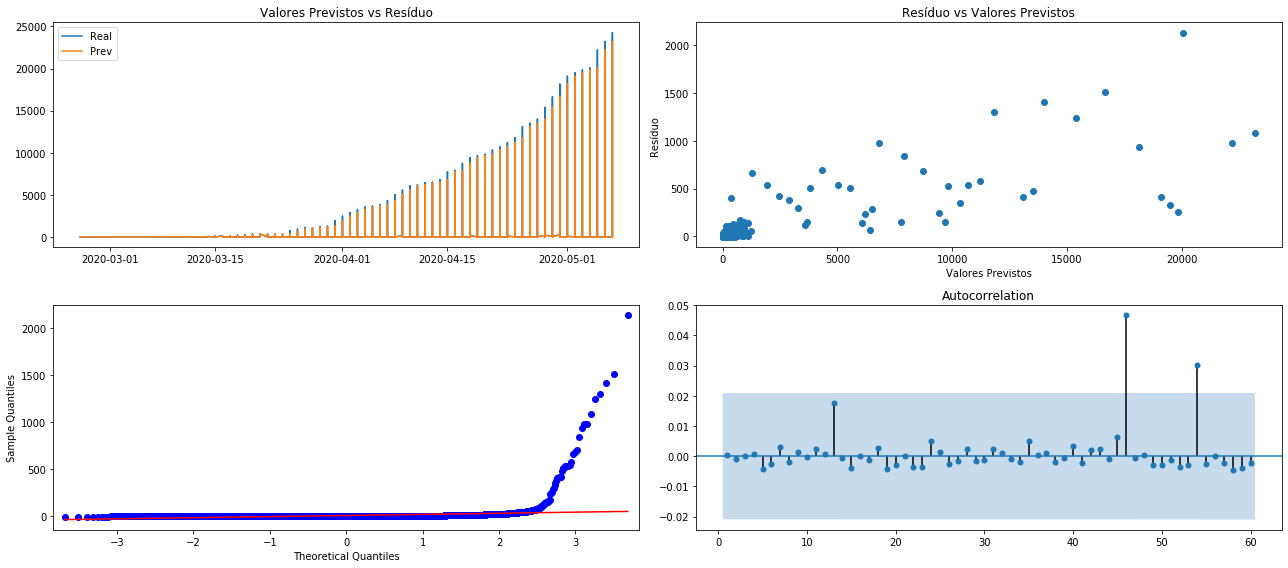

In [25]:
plotar_erro(df_casos)

### 1.4.2. Mortes Acumuladas

In [26]:
df_mortes = dados_tratados[['data', 'mortes_acumuladas', 'mortes_acumuladas_menos1d']].copy()

In [27]:
df_mortes.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real', 'mortes_acumuladas_menos1d': 'previsão'}
df_mortes.rename(columns=colunas, inplace=True)
#df_mortes = df_mortes.iloc[1:]
df_mortes

,real,previsão
data,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


In [28]:
check_erro(df_mortes['real'].values, df_mortes['previsão'], nome_col='Baseline', nome_indice='Base Completa')

,Baseline
Base Completa,
VIÉS,0.36453
MSE,21.03945
RMSE,4.58688
MAE,0.38204
MAPE,9.12069


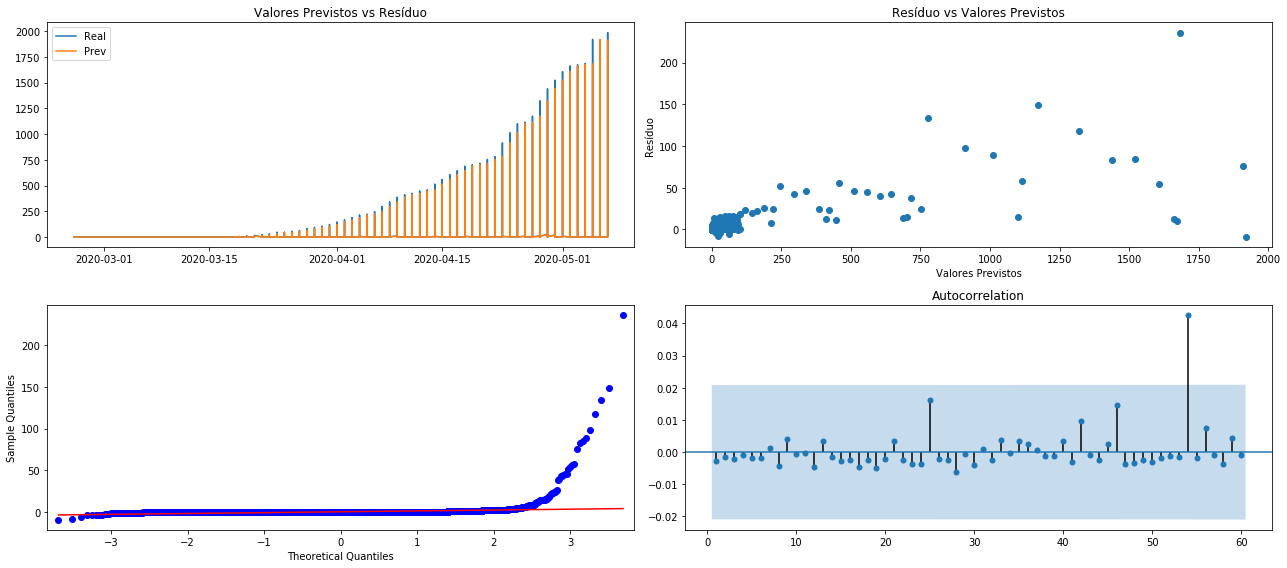

In [29]:
plotar_erro(df_mortes)

## 1.5. Separação da base em variáveis explicativas, target casos acumulados e target mortes acumuladas

In [30]:
pd.set_option('display.max_rows', 20)

In [31]:
explicativas = dados_sel.drop(columns=['casos_acumulados', 'mortes_acumuladas'])

In [32]:
explicativas.dtypes

dias_epidemiológicos            int64
dia_do_ano                      int64
mês                             int64
habitantes                      int64
lat                           float64
                               ...   
faixa_pop_Maior de 100 mil      uint8
faixa_pop_Maior de 50 mil       uint8
faixa_pop_Menor de 10 mil       uint8
LE_munuf                        int32
LE_Nome_Mesorregião             int32
Length: 59, dtype: object

In [33]:
target_casos = dados_sel['casos_acumulados']
target_mortes = dados_sel['mortes_acumuladas']

## 1.6. Modificação da distribuição das targets

Como a distribuição das targets está muito concentrada no zero, vamos aplicar uma função logarítmica para melhorar a performance do modelo.

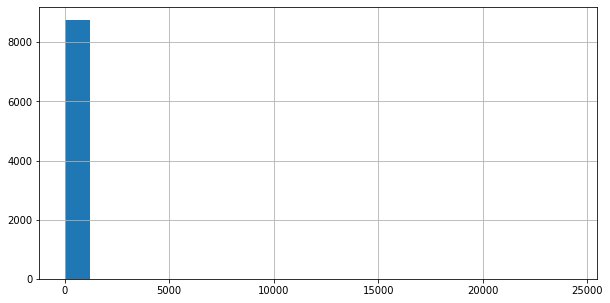

In [34]:
target_casos.hist(bins=20, figsize=(10,5))

In [35]:
target_casos_log = np.log1p(target_casos)

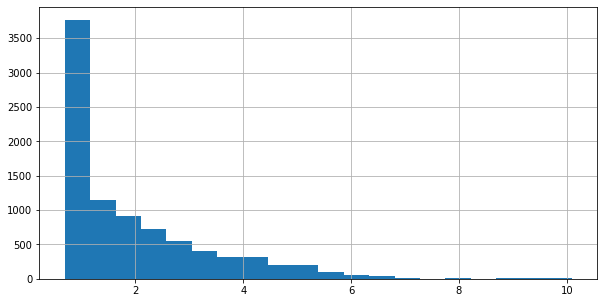

In [36]:
target_casos_log.hist(bins=20, figsize=(10,5))

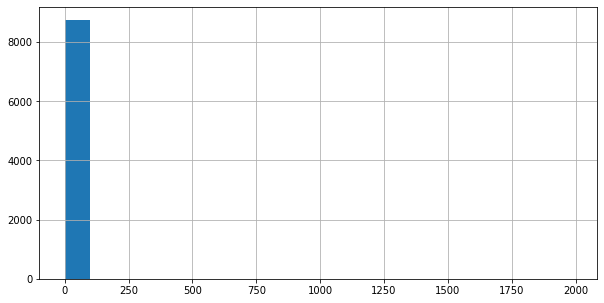

In [37]:
target_mortes.hist(bins=20, figsize=(10,5))

In [38]:
target_mortes_log = np.log1p(target_mortes)

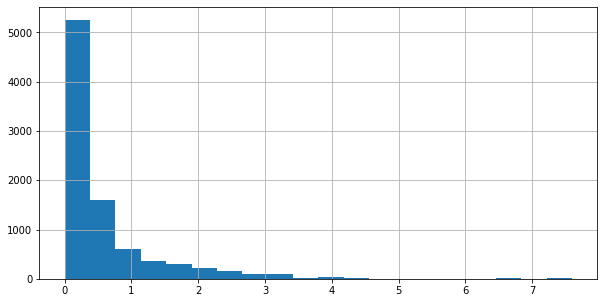

In [39]:
target_mortes_log.hist(bins=20, figsize=(10,5))

## 1.7. Seleção de Variáveis

### 1.7.1. Seleção baseada em filtro

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### 1.7.1.1. Casos acumulados

In [41]:
chi_selector1 = SelectKBest(chi2, k=30)
chi_selector1.fit(explicativas.abs(), target_casos)
chi_support1 = chi_selector1.get_support()
chi_feature1 = explicativas.loc[:,chi_support1].columns.tolist()
print(str(len(chi_feature1)), 'é o numero de variáveis selecionadas')
print(chi_feature1)

30 é o numero de variáveis selecionadas
['habitantes', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Outras_Especialidades_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d']


#### 1.7.1.2. Mortes acumuladas

In [42]:
chi_selector2 = SelectKBest(chi2, k=30)
chi_selector2.fit(explicativas.abs(), target_mortes)
chi_support2 = chi_selector2.get_support()
chi_feature2 = explicativas.loc[:,chi_support2].columns.tolist()
print(str(len(chi_feature2)), 'é o numero de variáveis selecionadas')
print(chi_feature2)

30 é o numero de variáveis selecionadas
['habitantes', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Outras_Especialidades_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d']


### 1.8.2. Seleção baseada em wrapper

In [43]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

#### 1.8.2.1. Casos acumulados

In [44]:
rfecv_selector1 = RFECV(estimator=LinearRegression(), step=10)
rfecv_selector1.fit(explicativas, target_casos_log)
rfecv_support1 = rfecv_selector1.get_support()
rfecv_feature1 = explicativas.loc[:,rfecv_support1].columns.tolist()
print(str(len(rfecv_feature1)), 'é o numero de variáveis selecionadas')
print(rfecv_feature1)

29 é o numero de variáveis selecionadas
['dias_epidemiológicos', 'dia_do_ano', 'mês', 'lat', 'lon', 'idhm_2010', 'Pediátrico_Não_SUS', 'Hospital/DIA_Não_SUS', 'Pediátrico_SUS', 'índice_isolamento', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60', 'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana', 'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil', 'faixa_pop_Menor de 10 mil']


#### 1.8.2.2. Mortes acumuladas

In [45]:
rfecv_selector2 = RFECV(estimator=LinearRegression(), step=10)
rfecv_selector2.fit(explicativas, target_mortes_log)
rfecv_support2 = rfecv_selector2.get_support()
rfecv_feature2 = explicativas.loc[:,rfecv_support2].columns.tolist()
print(str(len(rfecv_feature2)), 'é o numero de variáveis selecionadas')
print(rfecv_feature2)

19 é o numero de variáveis selecionadas
['dias_epidemiológicos', 'dia_do_ano', 'mês', 'idhm_2010', 'índice_isolamento', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60', 'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana', 'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil']


### 1.8.3. Seleção baseada em método embarcado

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

#### 1.8.3.1. Casos acumulados

In [47]:
rf_selector1 = SelectFromModel(RandomForestRegressor(n_estimators=300, random_state=14))
rf_selector1.fit(explicativas, target_casos)
rf_support1 = rf_selector1.get_support()
rf_feature1 = explicativas.loc[:,rf_support1].columns.tolist()
print(str(len(rf_feature1)), 'é o numero de variáveis selecionadas')
print(rf_feature1)

28 é o numero de variáveis selecionadas
['casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d']


#### 1.8.3.2. Mortes acumuladas

In [48]:
rf_selector2 = SelectFromModel(RandomForestRegressor(n_estimators=300, random_state=14))
rf_selector2.fit(explicativas, target_mortes)
rf_support2 = rf_selector2.get_support()
rf_feature2 = explicativas.loc[:,rf_support2].columns.tolist()
print(str(len(rf_feature2)), 'é o numero de variáveis selecionadas')
print(rf_feature2)

28 é o numero de variáveis selecionadas
['casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d']


### 1.8.4. Comparação dos diferentes métodos de seleção de variáveis

#### 1.8.4.1. Casos acumulados

In [49]:
pd.set_option('display.max_rows', None)
feature_selection_df = pd.DataFrame({'Variáveis': explicativas.columns,
                                     'Chi-2':chi_support1, 'RFECV': rfecv_support1, 'RF':rf_support1})

#count
feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)

#print
feature_selection_df = feature_selection_df.sort_values(['Total','Variáveis'],ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos9d,True,True,True,3
2,mortes_acumuladas_menos8d,True,True,True,3
3,mortes_acumuladas_menos7d,True,True,True,3
4,mortes_acumuladas_menos6d,True,True,True,3
5,mortes_acumuladas_menos5d,True,True,True,3
6,mortes_acumuladas_menos3d,True,True,True,3
7,mortes_acumuladas_menos2d,True,True,True,3
8,mortes_acumuladas_menos4d,True,False,True,2
9,mortes_acumuladas_menos1d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


In [50]:
feature_selection_df[feature_selection_df['Total']>0]

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos9d,True,True,True,3
2,mortes_acumuladas_menos8d,True,True,True,3
3,mortes_acumuladas_menos7d,True,True,True,3
4,mortes_acumuladas_menos6d,True,True,True,3
5,mortes_acumuladas_menos5d,True,True,True,3
6,mortes_acumuladas_menos3d,True,True,True,3
7,mortes_acumuladas_menos2d,True,True,True,3
8,mortes_acumuladas_menos4d,True,False,True,2
9,mortes_acumuladas_menos1d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


Vamos utilizar as 53 variáveis selecionadas em pelo menos 1 método.

In [51]:
varcasos = feature_selection_df[feature_selection_df['Total']>0]['Variáveis'].to_list()

#### 1.8.4.2. Mortes acumuladas

In [52]:
feature_selection_df2 = pd.DataFrame({'Variáveis': explicativas.columns,
                                     'Chi-2':chi_support2, 'RFECV': rfecv_support2, 'RF':rf_support2})

#count
feature_selection_df2['Total'] = np.sum(feature_selection_df2,axis=1)

#print
feature_selection_df2 = feature_selection_df2.sort_values(['Total','Variáveis'],ascending=False)
feature_selection_df2.index = range(1, len(feature_selection_df2)+1)
feature_selection_df2

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos8d,True,True,True,3
2,mortes_acumuladas_menos1d,True,True,True,3
3,mortes_acumuladas_menos9d,True,False,True,2
4,mortes_acumuladas_menos7d,True,False,True,2
5,mortes_acumuladas_menos6d,True,False,True,2
6,mortes_acumuladas_menos5d,True,False,True,2
7,mortes_acumuladas_menos4d,True,False,True,2
8,mortes_acumuladas_menos3d,True,False,True,2
9,mortes_acumuladas_menos2d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


In [53]:
feature_selection_df2[feature_selection_df2['Total']>0]

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos8d,True,True,True,3
2,mortes_acumuladas_menos1d,True,True,True,3
3,mortes_acumuladas_menos9d,True,False,True,2
4,mortes_acumuladas_menos7d,True,False,True,2
5,mortes_acumuladas_menos6d,True,False,True,2
6,mortes_acumuladas_menos5d,True,False,True,2
7,mortes_acumuladas_menos4d,True,False,True,2
8,mortes_acumuladas_menos3d,True,False,True,2
9,mortes_acumuladas_menos2d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


Vamos utilizar as 47 variáveis selecionadas em pelo menos 1 método.

In [54]:
varmortes = feature_selection_df2[feature_selection_df2['Total']>0]['Variáveis'].to_list()

In [55]:
pd.set_option('display.max_rows', 20)

# 2. Elaboração de Modelos

Estudando as técnicas de modelagem de séries temporais, selecionamos 2 métodos diferentes:
* No primeiro, fazemos uma previsão em laço, ou seja, analisamos os dados do 1º período para prever o 2º, acrescentamos o 2º período ao 1º para prever o 3º e assim por diante. 
* No segundo, que chamaremos de previsão tradicional, dividiremos a base em teste e treino, sendo que a base teste será composta dos primeiros 80% da base e a base treino será composta dos últimos 20%, em ordem cronológica.

## 2.1. Método de Previsão em Laço

### 2.1.1. Árvore de Decisão

#### 2.1.1.1. Casos Acumulados

In [56]:
expl_casos = explicativas[varcasos]

In [57]:
expl_casos

,mortes_acumuladas_menos9d,mortes_acumuladas_menos8d,mortes_acumuladas_menos7d,mortes_acumuladas_menos6d,mortes_acumuladas_menos5d,mortes_acumuladas_menos3d,mortes_acumuladas_menos2d,mortes_acumuladas_menos4d,mortes_acumuladas_menos1d,mortes_acumuladas_menos14d,mortes_acumuladas_menos13d,mortes_acumuladas_menos12d,mortes_acumuladas_menos10d,casos_acumulados_menos9d,casos_acumulados_menos8d,casos_acumulados_menos7d,casos_acumulados_menos6d,casos_acumulados_menos5d,casos_acumulados_menos4d,casos_acumulados_menos3d,casos_acumulados_menos2d,casos_acumulados_menos1d,casos_acumulados_menos14d,casos_acumulados_menos13d,casos_acumulados_menos12d,casos_acumulados_menos11d,casos_acumulados_menos10d,índice_isolamento,zona geográfica_Tropical,papel_Metropolitana,papel_Interior,mês,mortes_acumuladas_menos11d,lon,litoral_S,lat,idhm_2010,habitantes,faixa_pop_Menor de 10 mil,faixa_pop_Maior de 50 mil,faixa_pop_Maior de 100 mil,faixa meridional_meridiano 50 a 60,dias_epidemiológicos,dia_do_ano,capital_S,Pediátrico_SUS,Pediátrico_Não_SUS,Outras_Especialidades_SUS,Hospital/DIA_Não_SUS,Clínicos_SUS,Clínicos_Não_SUS,Cirúrgicos_SUS,Cirúrgicos_Não_SUS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,1,57,1,1280,917,2805,675,3983,5331,4279,4777
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,2,58,1,1280,917,2805,675,3983,5331,4279,4777
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,3,59,1,1280,917,2805,675,3983,5331,4279,4777
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,4,60,1,1280,917,2805,675,3983,5331,4279,4777
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0.53000,0,0,0,3,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,5,61,1,1285,920,2805,649,5921,5258,4279,4611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0.53000,1,0,1,5,0,-50.30800,0,-22.07300,0.73200,6638,1,0,0,1,18,128,0,0,0,0,0,0,0,0,0
8791,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,17,24,26,26,26,28,27,1,1,1,1,1,0.53000,1,0,1,5,0,-47.91400,0,-22.54900,0.75500,35653,0,0,0,0,40,128,0,2,2,0,0,36,4,20,12
8792,2,2,2,2,2,2,2,2,2,2,2,2,2,9,9,9,10,10,10,10,10,10,9,9,9,9,9,0.53000,1,0,1,5,2,-49.05400,0,-23.13400,0.68500,6357,1,0,0,0,21,128,0,0,0,0,0,5,0,3,0
8793,1,1,1,1,1,1,1,1,1,1,1,1,1,5,4,4,4,4,4,4,4,4,2,2,2,2,3,0.53000,1,0,1,5,1,-46.63300,0,-22.47600,0.74500,18705,0,0,0,0,36,128,0,6,2,0,0,15,7,3,1


In [58]:
df_casos_baseline_lasso = dados_tratados[['dia_do_ano', 'casos_acumulados', 'casos_acumulados_menos1d']].copy()

In [59]:
df_casos_baseline_lasso.set_index('dia_do_ano', inplace=True)
colunas = {'casos_acumulados': 'real', 'casos_acumulados_menos1d': 'previsão'}
df_casos_baseline_lasso.rename(columns=colunas, inplace=True)
df_casos_baseline_lasso

,real,previsão
dia_do_ano,,
57,1,0
58,1,1
59,1,1
60,1,1
61,1,1
...,...,...
128,2,2
128,36,27
128,10,10


#### Sem modificação da distribuição das targets

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [62]:
tree = DecisionTreeRegressor(random_state=14)

In [63]:
grid_tree = {'criterion':["mse", "friedman_mse", "mae"],
             'splitter':["best", "random"],
             'max_depth':[None, 10, 20, 50, 100],
             'min_samples_split':[2],
             'min_samples_leaf':[1, 10, 50, 100],
             'min_weight_fraction_leaf':[0.0, 0.1, 0.5],
             'max_features':["auto", "sqrt", "log2", None],
             'random_state':[14],
             #'max_leaf_nodes':[None,10,20,30,50,100],
             #'min_impurity_decrease':[0.0,0.1,0.5,1.0],             
             'ccp_alpha':[0.0,0.5,1.0]
            }

In [64]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [65]:
xtr = expl_casos[explicativas['dia_do_ano'] < 128]
xts = expl_casos[explicativas['dia_do_ano'] == 128]
ytr, yts = target_casos[explicativas['dia_do_ano'] < 128].values, target_casos[explicativas['dia_do_ano'] == 128].values

In [66]:
grid_tree_treino = GridSearchCV(estimator=tree,
                                param_grid=grid_tree,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_tree_treino.fit(xtr, ytr)

Fitting 2 folds for each of 4320 candidates, totalling 8640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 30.0min finished


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=14),
             param_grid={'ccp_alpha': [0.0, 0.5, 1.0],
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 50, 100],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
                         'random_state': [14], 'splitter': ['best', 'random']},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [67]:
grid_tree_treino.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 14,
 'splitter': 'best'}

In [68]:
grid_tree_best = grid_tree_treino.best_estimator_

In [69]:
dia = 58
prev = {}
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_casos[explicativas['dia_do_ano'] < dia]
        val = expl_casos[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        #ytr, yts = target_casos_log[explicativas['dia_do_ano'] < dia].values, target_casos_log[explicativas['dia_do_ano'] == dia].values
        ytr, yts = target_casos[explicativas['dia_do_ano'] < dia].values, target_casos[explicativas['dia_do_ano'] == dia].values

        #tree = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20, max_features='auto',
        #                             min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
        #                             random_state=14, splitter='random')
        #tree.fit(xtr,ytr)
        grid_tree_best.fit(xtr,ytr)

        #p = np.expm1(tree.predict(xts))
        #p = tree.predict(xts)
        p = grid_tree_best.predict(xts)
        
        prev.update({dia: p.round(decimals=0)})


        erro_teste['Baseline'] = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                                            df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
       
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 62 - Viés 1.0, MSE 1.0, RMSE 1.0, MAE 1.0, MAPE 50.0
Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 64 - Viés 1.0, MSE 1.0, RMSE 1.0, MAE 1.0, MAPE 33.33333333333333
Dia do ano 65 - Viés 3.0, MSE 9.0, RMSE 3.0, MAE 3.0, MAPE 50.0
Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 68 - Viés 4.0, MSE 41.0, RMSE 6.4031242374328485, MAE 5.0, MAPE 80.0
Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 70 - Viés 1.5, MSE 4.5, RMSE 2.1213203435596424, MAE 1.5, MAPE 8.333333333333332
Dia do ano 71 - Viés 6.0, MSE 72.0, RMSE 8.48528137423857, MAE 6.0, MAPE 20.0
Dia do ano 72 - Viés 4.666666666666667, M

Dia do ano 127 - Viés 2.7656009868382188, MSE 2653.2705294890584, RMSE 51.50990710037301, MAE 5.852250319539669, MAPE 19.714591382270253
Dia do ano 128 - Viés 0.17281574094250413, MSE 5101.01274976373, RMSE 71.42137460007145, MAE 7.477904558099131, MAPE 13.267786005457038


* Sem modificação das targets, a árvore de decisão conseguiu prever os 128 dias.

In [70]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [71]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred1 = pd.concat([dt,pt], axis=1, join='inner')

In [72]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [73]:
y_pred1 = pd.merge(y_pred1, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred1 = y_pred1.loc[y_pred1['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred1 = y_pred1.astype('int64')

In [74]:
df_casos_teste_lasso = dados_tratados[['data', 'casos_acumulados']][dados_tratados['dia_do_ano'] <= dia].copy()
df_casos_teste_lasso.drop([0], inplace=True)
df_casos_teste_lasso.set_index('data', inplace=True)
df_casos_teste_lasso = pd.concat([df_casos_teste_lasso,y_pred1], axis=1, join='inner')
colunas = {'casos_acumulados': 'real'}
df_casos_teste_lasso.rename(columns=colunas, inplace=True)
df_casos_teste_lasso

,real,previsão
data,,
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
2020-03-02,2,1
...,...,...
2020-05-07,2,2
2020-05-07,36,27
2020-05-07,10,13


Text(0, 0.5, 'previsão')

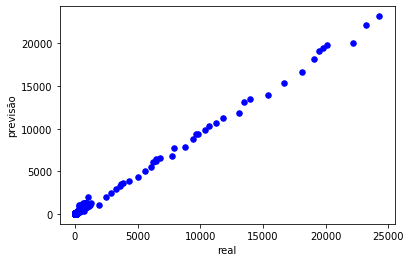

In [75]:
plt.scatter(df_casos_teste_lasso['real'], df_casos_teste_lasso['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [76]:
df_casos_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,71.08847,69.17341
std,818.10473,776.81419
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,13.00000,14.00000
max,24273.00000,23187.00000


Sem log1p
*  	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	71.08847 	69.17341
* std 	818.10473 	776.81419
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	13.00000 	14.00000
* max 	24273.00000 	23187.00000

In [77]:
df_casos_teste_lasso[df_casos_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem casos negativos

In [78]:
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(df_casos_teste_lasso['real'],
                                                                df_casos_teste_lasso['previsão'])

In [79]:
erro_teste

,Baseline,Decision Tree ScikitLearn (laço)
Base Teste,,
VIÉS,4.54008,1.91506
MSE,2534.63900,3027.51228
RMSE,50.34520,55.02283
MAE,4.65810,5.82272
MAPE,11.77102,13.69047


sem log1p:
* Baseline 	Decision Tree ScikitLearn (laço)
* Base Teste 		
* VIÉS 	4.54008 	1.91506
* MSE 	2534.63900 	3027.51228
* RMSE 	50.34520 	55.02283
* MAE 	4.65810 	5.82272
* MAPE 	11.77102 	13.69047

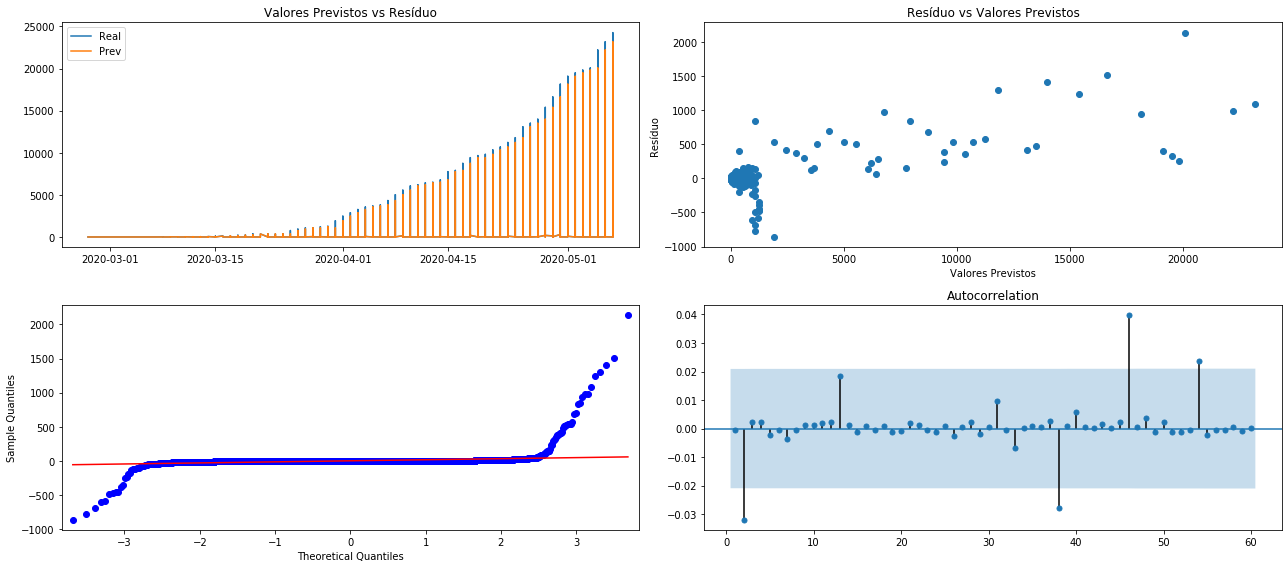

In [80]:
plotar_erro(df_casos_teste_lasso)

Conclusões:
* Com árvore de decisão com GridSearch sem modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. Com a base teste, a árvore de decisão com GridSearch teve desempenho pouco pior que a baseline, mas muito melhor do que a regressão linear e melhor que a árvore de decisão sem GridSearch. O erro médio absoluto foi de 5.8 casos, contra 4.6 casos na baseline (que apenas repete o resultado do dia anterior). 

#### Com modificação da distribuição das targets

In [81]:
tree = DecisionTreeRegressor(random_state=14)

In [82]:
grid_tree = {'criterion':["mse", "friedman_mse", "mae"],
             'splitter':["best", "random"],
             'max_depth':[None, 10, 20, 50, 100],
             'min_samples_split':[2],
             'min_samples_leaf':[1, 10, 50, 100],
             'min_weight_fraction_leaf':[0.0, 0.1, 0.5],
             'max_features':["auto", "sqrt", "log2", None],
             'random_state':[14],
             #'max_leaf_nodes':[None,10,20,30,50,100],
             #'min_impurity_decrease':[0.0,0.1,0.5,1.0],             
             'ccp_alpha':[0.0,0.5,1.0]
            }

In [83]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [84]:
xtr = expl_casos[explicativas['dia_do_ano'] < 128]
xts = expl_casos[explicativas['dia_do_ano'] == 128]
ytr, yts = target_casos_log[explicativas['dia_do_ano'] < 128].values, target_casos_log[explicativas['dia_do_ano'] == 128].values

In [85]:
grid_tree_treino = GridSearchCV(estimator=tree,
                                param_grid=grid_tree,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_tree_treino.fit(xtr, ytr)

Fitting 2 folds for each of 4320 candidates, totalling 8640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 24.8min finished


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=14),
             param_grid={'ccp_alpha': [0.0, 0.5, 1.0],
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 50, 100],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
                         'random_state': [14], 'splitter': ['best', 'random']},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [86]:
grid_tree_treino.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 14,
 'splitter': 'best'}

In [87]:
grid_tree_best = grid_tree_treino.best_estimator_

In [88]:
dia = 58
prev = {}
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_casos[explicativas['dia_do_ano'] < dia]
        val = expl_casos[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_casos_log[explicativas['dia_do_ano'] < dia].values, target_casos_log[explicativas['dia_do_ano'] == dia].values
        #ytr, yts = target_casos[explicativas['dia_do_ano'] < dia].values, target_casos[explicativas['dia_do_ano'] == dia].values

        #tree = DecisionTreeRegressor(criterion='mae', random_state=14)
        #tree.fit(xtr,ytr)
        
        grid_tree_best.fit(xtr,ytr)
        
        p = np.expm1(grid_tree_best.predict(xts))
        #p = np.expm1(tree.predict(xts))
        #p = tree.predict(xts)
        
        prev.update({dia: p.round(decimals=0)})


        erro_teste['Baseline'] = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                                            df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
       
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

Dia do ano 58 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 59 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 60 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 61 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 62 - Viés 0.09861228866810978, MSE 0.009724383476362612, RMSE 0.09861228866810978, MAE 0.09861228866810978, MAPE 8.97607733731627
Dia do ano 63 - Viés 0.09861228866810978, MSE 0.009724383476362612, RMSE 0.09861228866810978, MAE 0.09861228866810978, MAPE 8.97607733731627
Dia do ano 64 - Viés 0.3862943611198906, MSE 0.14922333343302444, RMSE 0.3862943611198906, MAE 0.3862943611198906, MAPE 27.865247955551826
Dia do ano 65 - Viés 0.

Dia do ano 118 - Viés -54.11482840538683, MSE 270978.05435319646, RMSE 520.5555247552335, MAE 54.13064399585852, MAPE 854.2298963671151
Dia do ano 119 - Viés -55.60864034959208, MSE 300140.2084252462, RMSE 547.8505347494389, MAE 55.641452402611904, MAPE 865.992250609614
Dia do ano 120 - Viés -71.18676556931602, MSE 456315.581433308, RMSE 675.5113481158611, MAE 71.20516164874705, MAPE 1086.4918606035844
Dia do ano 121 - Viés -73.16301027665646, MSE 466154.84718688106, RMSE 682.7553347919597, MAE 73.16792553092029, MAPE 1111.8380163359084
Dia do ano 122 - Viés -68.55822621277044, MSE 476734.4383867933, RMSE 690.4595849047164, MAE 68.57432216182382, MAPE 1041.0290939670142
Dia do ano 123 - Viés -82.54961270584745, MSE 595133.9517617675, RMSE 771.4492541715025, MAE 82.54961270584745, MAPE 1244.1854648694202
Dia do ano 124 - Viés -76.15862463880528, MSE 598466.1100189388, RMSE 773.6059138986327, MAE 76.15862463880528, MAPE 1143.7839885496471
Dia do ano 125 - Viés -99.44681431536043, MSE 847

* Com modificação das targets, a árvore de decisão conseguiu prever os 128 dias.

In [89]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [90]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred1 = pd.concat([dt,pt], axis=1, join='inner')

In [91]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [92]:
y_pred1 = pd.merge(y_pred1, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred1 = y_pred1.loc[y_pred1['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred1 = y_pred1.astype('int64')

In [93]:
df_casos_teste_lasso = dados_tratados[['data', 'casos_acumulados']][dados_tratados['dia_do_ano'] <= dia].copy()
df_casos_teste_lasso.drop([0], inplace=True)
df_casos_teste_lasso.set_index('data', inplace=True)
df_casos_teste_lasso = pd.concat([df_casos_teste_lasso,y_pred1], axis=1, join='inner')
colunas = {'casos_acumulados': 'real'}
df_casos_teste_lasso.rename(columns=colunas, inplace=True)
df_casos_teste_lasso

,real,previsão
data,,
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
2020-03-02,2,1
...,...,...
2020-05-07,2,2
2020-05-07,36,29
2020-05-07,10,10


Text(0, 0.5, 'previsão')

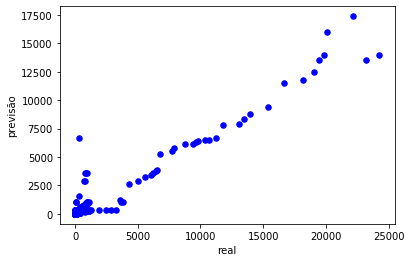

In [94]:
plt.scatter(df_casos_teste_lasso['real'], df_casos_teste_lasso['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [95]:
df_casos_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,71.08847,55.90687
std,818.10473,552.87164
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,13.00000,13.00000
max,24273.00000,17377.00000


Com log1p
*  	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	71.08847 	55.90687
* std 	818.10473 	552.87164
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	13.00000 	13.00000
* max 	24273.00000 	17377.00000

In [96]:
df_casos_teste_lasso[df_casos_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem casos negativos

In [97]:
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(df_casos_teste_lasso['real'],
                                                                df_casos_teste_lasso['previsão'])

In [98]:
erro_teste

,Baseline,Decision Tree ScikitLearn (laço)
Base Teste,,
VIÉS,4.54008,15.18160
MSE,2534.63900,93377.15431
RMSE,50.34520,305.57676
MAE,4.65810,23.01717
MAPE,11.77102,12.81933


Com log1p:
*  	Baseline 	Decision Tree ScikitLearn (laço)
* Base Teste 		
* VIÉS 	4.54008 	15.18160
* MSE 	2534.63900 	93377.15431
* RMSE 	50.34520 	305.57676
* MAE 	4.65810 	23.01717
* MAPE 	11.77102 	12.81933

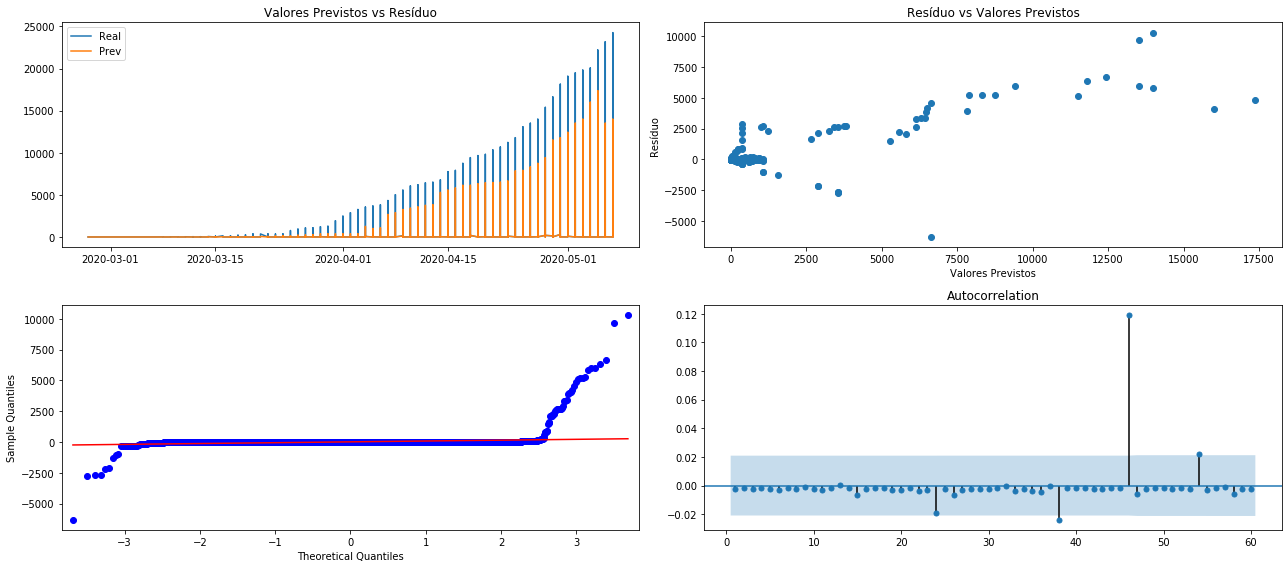

In [99]:
plotar_erro(df_casos_teste_lasso)

Conclusões:
* Com árvore de decisão com modificação da distribuição da target e GridSearch, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. Com a base teste, a árvore de decisão com GridSearch se saiu pior do que a árvore de decisão simples e que a árvore de decisão com GridSearch sem modificação da distribuição da target: o erro absoluto aumentou, devido às previsões do início e do fim do gráfico de dispersão.

#### 2.1.1.2. Mortes Acumuladas

In [100]:
expl_mortes = explicativas[varmortes]

In [101]:
expl_mortes

,mortes_acumuladas_menos8d,mortes_acumuladas_menos1d,mortes_acumuladas_menos9d,mortes_acumuladas_menos7d,mortes_acumuladas_menos6d,mortes_acumuladas_menos5d,mortes_acumuladas_menos4d,mortes_acumuladas_menos3d,mortes_acumuladas_menos2d,mortes_acumuladas_menos14d,mortes_acumuladas_menos13d,mortes_acumuladas_menos12d,mortes_acumuladas_menos11d,mortes_acumuladas_menos10d,casos_acumulados_menos9d,casos_acumulados_menos8d,casos_acumulados_menos7d,casos_acumulados_menos6d,casos_acumulados_menos5d,casos_acumulados_menos4d,casos_acumulados_menos3d,casos_acumulados_menos2d,casos_acumulados_menos1d,casos_acumulados_menos14d,casos_acumulados_menos13d,casos_acumulados_menos12d,casos_acumulados_menos11d,casos_acumulados_menos10d,índice_isolamento,zona geográfica_Tropical,papel_Metropolitana,papel_Interior,mês,litoral_S,idhm_2010,habitantes,faixa_pop_Maior de 50 mil,faixa_pop_Maior de 100 mil,faixa meridional_meridiano 50 a 60,dias_epidemiológicos,dia_do_ano,capital_S,Outras_Especialidades_SUS,Clínicos_SUS,Clínicos_Não_SUS,Cirúrgicos_SUS,Cirúrgicos_Não_SUS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,1,57,1,2805,3983,5331,4279,4777
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,2,58,1,2805,3983,5331,4279,4777
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,3,59,1,2805,3983,5331,4279,4777
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,4,60,1,2805,3983,5331,4279,4777
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0.53000,0,0,0,3,0,0.80500,12252023,0,1,0,5,61,1,2805,5921,5258,4279,4611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0.53000,1,0,1,5,0,0.73200,6638,0,0,1,18,128,0,0,0,0,0,0
8791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,17,24,26,26,26,28,27,1,1,1,1,1,0.53000,1,0,1,5,0,0.75500,35653,0,0,0,40,128,0,0,36,4,20,12
8792,2,2,2,2,2,2,2,2,2,2,2,2,2,2,9,9,9,10,10,10,10,10,10,9,9,9,9,9,0.53000,1,0,1,5,0,0.68500,6357,0,0,0,21,128,0,0,5,0,3,0
8793,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,4,4,4,4,4,4,4,4,2,2,2,2,3,0.53000,1,0,1,5,0,0.74500,18705,0,0,0,36,128,0,0,15,7,3,1


In [102]:
df_mortes_baseline_lasso = dados_tratados[['dia_do_ano', 'mortes_acumuladas', 'mortes_acumuladas_menos1d']].copy()

In [103]:
df_mortes_baseline_lasso.set_index('dia_do_ano', inplace=True)
colunas = {'mortes_acumuladas': 'real', 'mortes_acumuladas_menos1d': 'previsão'}
df_mortes_baseline_lasso.rename(columns=colunas, inplace=True)
df_mortes_baseline_lasso

,real,previsão
dia_do_ano,,
57,0,0
58,0,0
59,0,0
60,0,0
61,0,0
...,...,...
128,0,0
128,0,0
128,2,2


#### Sem modificação da distribuição das targets

In [104]:
tree = DecisionTreeRegressor(random_state=14)

In [105]:
grid_tree = {'criterion':["mse", "friedman_mse", "mae"],
             'splitter':["best", "random"],
             'max_depth':[None, 10, 20, 50, 100],
             'min_samples_split':[2],
             'min_samples_leaf':[1, 10, 50, 100],
             'min_weight_fraction_leaf':[0.0, 0.1, 0.5],
             'max_features':["auto", "sqrt", "log2", None],
             'random_state':[14],
             #'max_leaf_nodes':[None,10,20,30,50,100],
             #'min_impurity_decrease':[0.0,0.1,0.5,1.0],             
             'ccp_alpha':[0.0,0.5,1.0]
            }

In [106]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [107]:
xtr = expl_mortes[explicativas['dia_do_ano'] < 128]
xts = expl_mortes[explicativas['dia_do_ano'] == 128]
ytr, yts = target_mortes[explicativas['dia_do_ano'] < 128].values, target_mortes[explicativas['dia_do_ano'] == 128].values

In [108]:
grid_tree_treino = GridSearchCV(estimator=tree,
                                param_grid=grid_tree,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_tree_treino.fit(xtr, ytr)

Fitting 2 folds for each of 4320 candidates, totalling 8640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 23.7min finished


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=14),
             param_grid={'ccp_alpha': [0.0, 0.5, 1.0],
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 50, 100],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
                         'random_state': [14], 'splitter': ['best', 'random']},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [109]:
grid_tree_treino.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 14,
 'splitter': 'random'}

In [110]:
grid_tree_best = grid_tree_treino.best_estimator_

In [111]:
dia = 58
prev = {}
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_mortes[explicativas['dia_do_ano'] < dia]
        val = expl_mortes[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        #ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < dia].values, target_mortes_log[explicativas['dia_do_ano'] == dia].values
        ytr, yts = target_mortes[explicativas['dia_do_ano'] < dia].values, target_mortes[explicativas['dia_do_ano'] == dia].values

        #tree = DecisionTreeRegressor(criterion='mae', random_state=14)
        #tree.fit(xtr,ytr)
        grid_tree_best.fit(xtr,ytr)

        #p = np.expm1(tree.predict(xts))
        #p = tree.predict(xts)
        p = grid_tree_best.predict(xts)
      
        prev.update({dia: p.round(decimals=0)})

        
        erro_teste['Baseline'] = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                                            df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
                
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e

Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 62 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 64 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 65 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 68 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 70 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 71 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 72 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 73 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, M

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e

Dia do ano 75 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 76 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 77 - Viés 0.125, MSE 0.125, RMSE 0.3535533905932738, MAE 0.125, MAPE nan
Dia do ano 78 - Viés 0.0625, MSE 0.0625, RMSE 0.25, MAE 0.0625, MAPE nan
Dia do ano 79 - Viés 0.17647058823529413, MSE 0.5294117647058824, RMSE 0.7276068751089989, MAE 0.17647058823529413, MAPE nan
Dia do ano 80 - Viés 0.2, MSE 0.8, RMSE 0.8944271909999159, MAE 0.2, MAPE nan
Dia do ano 81 - Viés 0.2608695652173913, MSE 1.565217391304348, RMSE 1.2510864843424485, MAE 0.2608695652173913, MAPE nan
Dia do ano 82 - Viés 0.30434782608695654, MSE 2.130434782608696, RMSE 1.4596008983995234, MAE 0.30434782608695654, MAPE nan
Dia do ano 83 - Viés 0.34782608695652173, MSE 2.782608695652174, RMSE 1.6681153124565982, MAE 0.34782608695652173, MAPE nan
Dia do ano 84 - Viés 0.6956521739130435, MSE 9.826086956521738, RMSE 3.134658985682771, MAE 0.6956521739130435, MAPE nan
Dia do ano 85 - Viés -0

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value 

Dia do ano 88 - Viés 0.42105263157894735, MSE 6.7368421052631575, RMSE 2.5955427380922007, MAE 0.42105263157894735, MAPE nan
Dia do ano 89 - Viés 0.1276595744680851, MSE 4.680851063829787, RMSE 2.1635274585338147, MAE 0.46808510638297873, MAPE nan
Dia do ano 90 - Viés 0.22448979591836735, MSE 2.5510204081632653, RMSE 1.5971914124998499, MAE 0.30612244897959184, MAPE nan
Dia do ano 91 - Viés 0.3283582089552239, MSE 4.895522388059701, RMSE 2.212582741517185, MAE 0.3283582089552239, MAPE nan
Dia do ano 92 - Viés 0.3698630136986301, MSE 7.383561643835616, RMSE 2.717270991976254, MAE 0.4246575342465753, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value

Dia do ano 93 - Viés 0.2597402597402597, MSE 5.324675324675325, RMSE 2.3075258015188744, MAE 0.36363636363636365, MAPE nan
Dia do ano 94 - Viés 0.2988505747126437, MSE 5.7011494252873565, RMSE 2.3877079857652936, MAE 0.39080459770114945, MAPE nan
Dia do ano 95 - Viés 0.3541666666666667, MSE 7.333333333333333, RMSE 2.70801280154532, MAE 0.4791666666666667, MAPE nan

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value


Dia do ano 96 - Viés 0.16666666666666666, MSE 0.8333333333333334, RMSE 0.9128709291752769, MAE 0.22916666666666666, MAPE nan
Dia do ano 97 - Viés 0.18691588785046728, MSE 5.644859813084112, RMSE 2.3758913723241037, MAE 0.35514018691588783, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 98 - Viés -0.008403361344537815, MSE 44.15966386554622, RMSE 6.6452737991407265, MAE 1.1008403361344539, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 99 - Viés 0.3382352941176471, MSE 13.794117647058824, RMSE 3.7140433017210266, MAE 0.4852941176470588, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 100 - Viés 0.3819444444444444, MSE 15.04861111111111, RMSE 3.879253937435794, MAE 0.5486111111111112, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 101 - Viés -0.013157894736842105, MSE 7.302631578947368, RMSE 2.7023381688729056, MAE 0.5789473684210527, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 102 - Viés 0.05625, MSE 1.21875, RMSE 1.103970108290981, MAE 0.19375, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 103 - Viés -0.05555555555555555, MSE 4.981481481481482, RMSE 2.231923269622296, MAE 0.3888888888888889, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 104 - Viés 0.0, MSE 1.0602409638554218, RMSE 1.029680029842, MAE 0.21686746987951808, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 105 - Viés 0.32044198895027626, MSE 17.80110497237569, RMSE 4.219135571698981, MAE 0.585635359116022, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 106 - Viés 0.32323232323232326, MSE 11.626262626262626, RMSE 3.4097305797177913, MAE 0.5757575757575758, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 107 - Viés 0.24154589371980675, MSE 10.405797101449275, RMSE 3.2258017765277014, MAE 0.47342995169082125, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 108 - Viés -0.06222222222222222, MSE 15.6, RMSE 3.9496835316262997, MAE 0.6844444444444444, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 109 - Viés -0.061946902654867256, MSE 14.106194690265486, RMSE 3.7558214401466805, MAE 0.584070796460177, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 110 - Viés -0.09606986899563319, MSE 1.982532751091703, RMSE 1.4080244142385114, MAE 0.3406113537117904, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 111 - Viés -0.2264957264957265, MSE 5.14957264957265, RMSE 2.2692669850796863, MAE 0.4829059829059829, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 112 - Viés 0.17083333333333334, MSE 6.6625, RMSE 2.5811818998280613, MAE 0.3625, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 113 - Viés 0.004132231404958678, MSE 3.458677685950413, RMSE 1.8597520495889803, MAE 0.3347107438016529, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 114 - Viés 0.69921875, MSE 71.69921875, RMSE 8.46753912007497, MAE 0.86328125, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 115 - Viés 0.503731343283582, MSE 37.01865671641791, RMSE 6.084295909669245, MAE 0.7126865671641791, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 116 - Viés 0.40425531914893614, MSE 29.70921985815603, RMSE 5.450616465883105, MAE 0.6808510638297872, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 117 - Viés -0.0636042402826855, MSE 2.487632508833922, RMSE 1.5772230371237679, MAE 0.31802120141342755, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 118 - Viés 0.21951219512195122, MSE 13.013937282229966, RMSE 3.6074835110129007, MAE 0.554006968641115, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 119 - Viés 0.4883720930232558, MSE 75.10631229235881, RMSE 8.66638980731647, MAE 0.8538205980066446, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 120 - Viés 0.42628205128205127, MSE 46.25320512820513, RMSE 6.800970895997507, MAE 0.7403846153846154, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 121 - Viés 0.0529595015576324, MSE 25.978193146417446, RMSE 5.096880727113147, MAE 0.6448598130841121, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 122 - Viés -0.4484848484848485, MSE 111.86666666666666, RMSE 10.576703960434303, MAE 1.1515151515151516, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 123 - Viés -0.12912912912912913, MSE 23.792792792792792, RMSE 4.877785644408003, MAE 0.5915915915915916, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 124 - Viés -0.08708708708708708, MSE 4.177177177177177, RMSE 2.0438143695495383, MAE 0.3633633633633634, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 125 - Viés -0.23880597014925373, MSE 7.074626865671642, RMSE 2.659817073723613, MAE 0.4716417910447761, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 126 - Viés 1.0, MSE 164.97674418604652, RMSE 12.844327315435656, MAE 1.1627906976744187, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 127 - Viés -0.1347708894878706, MSE 1.4285714285714286, RMSE 1.1952286093343936, MAE 0.37735849056603776, MAPE nan
Dia do ano 128 - Viés 0.16535433070866143, MSE 18.46456692913386, RMSE 4.297041648522138, MAE 0.6377952755905512, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


* Sem modificação das targets, a árvore de decisão conseguiu prever os 128 dias.

In [112]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [113]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred2 = pd.concat([dt,pt], axis=1, join='inner')

In [114]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [115]:
y_pred2 = pd.merge(y_pred2, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred2 = y_pred2.loc[y_pred2['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred2 = y_pred2.astype('int64')

In [116]:
df_mortes_teste_lasso = dados_tratados[['data', 'mortes_acumuladas']][dados_tratados['dia_do_ano'] <= dia].copy()
df_mortes_teste_lasso.drop([0], inplace=True)
df_mortes_teste_lasso.set_index('data', inplace=True)
df_mortes_teste_lasso = pd.concat([df_mortes_teste_lasso,y_pred2], axis=1, join='inner')
colunas = {'mortes_acumuladas': 'real'}
df_mortes_teste_lasso.rename(columns=colunas, inplace=True)
df_mortes_teste_lasso

,real,previsão
data,,
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
2020-03-02,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


Text(0, 0.5, 'previsão')

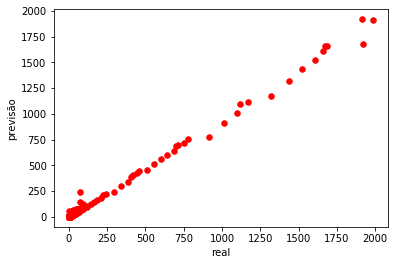

In [117]:
plt.scatter(df_mortes_teste_lasso['real'], df_mortes_teste_lasso['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [118]:
df_mortes_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,5.53411,5.38617
std,67.05556,63.68809
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1986.00000,1919.00000


Sem log1p:

* 	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	5.53411 	5.38617
* std 	67.05556 	63.68809
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1986.00000 	1919.00000

In [119]:
df_mortes_teste_lasso[df_mortes_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [120]:
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Árvore de Decisão Sem Modificação da Distr. Target (laço)'] = check_erro(df_mortes_teste_lasso['real'],
                                                                df_mortes_teste_lasso['previsão'])

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [121]:
erro_teste

,Baseline,Árvore de Decisão Sem Modificação da Distr. Target (laço)
Base Teste,,
VIÉS,0.36453,0.14794
MSE,21.03945,26.58347
RMSE,4.58688,5.15592
MAE,0.38204,0.56709
MAPE,nan,inf


Sem log1p:
* Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.36453 	0.14794
* MSE 	21.03945 	26.58347
* RMSE 	4.58688 	5.15592
* MAE 	0.38204 	0.56709
* MAPE 	nan 	inf

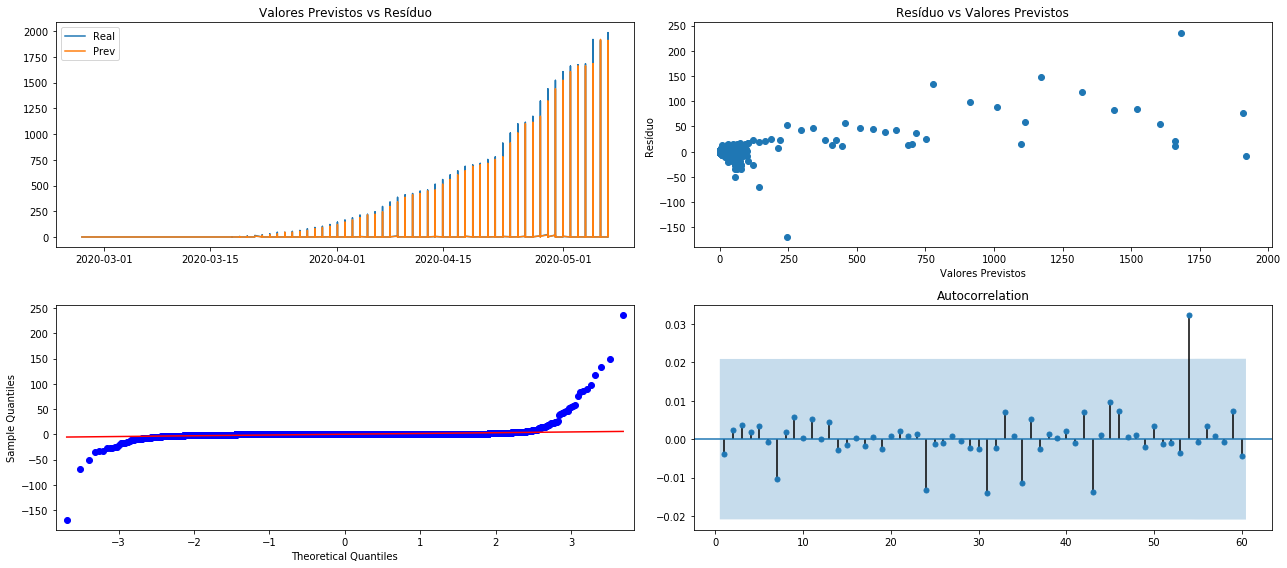

In [122]:
plotar_erro(df_mortes_teste_lasso)

Com árvore de decisão e GridSearch sem modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente.
Com a base teste, a árvore de decisão com GridSearch teve desempenho pouco pior que a baseline, equivalente à àrvore de decisão sem GridSearch (melhorou o MAE, mas piorou o RMSE), mas muito melhor do que a regressão linear. O erro médio absoluto foi de 0.56 mortes, contra 0.38 mortes na baseline (que apenas repete o resultado do dia anterior). 

#### Com modificação da distribuição das targets

In [123]:
tree = DecisionTreeRegressor(random_state=14)

In [124]:
grid_tree = {'criterion':["mse", "friedman_mse", "mae"],
             'splitter':["best", "random"],
             'max_depth':[None, 10, 20, 50, 100],
             'min_samples_split':[2],
             'min_samples_leaf':[1, 10, 50, 100],
             'min_weight_fraction_leaf':[0.0, 0.1, 0.5],
             'max_features':["auto", "sqrt", "log2", None],
             'random_state':[14],
             #'max_leaf_nodes':[None,10,20,30,50,100],
             #'min_impurity_decrease':[0.0,0.1,0.5,1.0],             
             'ccp_alpha':[0.0,0.5,1.0]
            }

In [125]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [126]:
xtr = expl_mortes[explicativas['dia_do_ano'] < 128]
xts = expl_mortes[explicativas['dia_do_ano'] == 128]
ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < 128].values, target_mortes_log[explicativas['dia_do_ano'] == 128].values

In [127]:
grid_tree_treino = GridSearchCV(estimator=tree,
                                param_grid=grid_tree,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_tree_treino.fit(xtr, ytr)

Fitting 2 folds for each of 4320 candidates, totalling 8640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 16.9min finished


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=14),
             param_grid={'ccp_alpha': [0.0, 0.5, 1.0],
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 50, 100],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
                         'random_state': [14], 'splitter': ['best', 'random']},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [128]:
grid_tree_treino.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 14,
 'splitter': 'best'}

In [129]:
grid_tree_best = grid_tree_treino.best_estimator_

In [130]:
dia = 58
prev = {}
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_mortes[explicativas['dia_do_ano'] < dia]
        val = expl_mortes[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < dia].values, target_mortes_log[explicativas['dia_do_ano'] == dia].values
        #ytr, yts = target_mortes[explicativas['dia_do_ano'] < dia].values, target_mortes[explicativas['dia_do_ano'] == dia].values

        #tree = DecisionTreeRegressor(criterion='mae', random_state=14)
        #tree.fit(xtr,ytr)
        grid_tree_best.fit(xtr, ytr)

        #p = np.expm1(tree.predict(xts))
        #p = tree.predict(xts)
        p=np.expm1(grid_tree_best.predict(xts))
      
        prev.update({dia: p.round(decimals=0)})

        
        erro_teste['Baseline'] = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                                            df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
                
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e

Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 62 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 64 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 65 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 68 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 70 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 71 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 72 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 73 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, M

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e


Dia do ano 76 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 77 - Viés 0.08664339756999316, MSE 0.060056626739775174, RMSE 0.24506453586713678, MAE 0.08664339756999316, MAPE nan
Dia do ano 78 - Viés 0.06866326804175686, MSE 0.07543431005078638, RMSE 0.27465307216702745, MAE 0.06866326804175686, MAPE nan
Dia do ano 79 - Viés 0.1053976158369444, MSE 0.18884717620990596, RMSE 0.43456550278399453, MAE 0.1053976158369444, MAPE nan
Dia do ano 80 - Viés 0.11512925464970229, MSE 0.26509490552391995, RMSE 0.5148736791912362, MAE 0.11512925464970229, MAPE nan
Dia do ano 81 - Viés 0.1205473357495557, MSE 0.3342281835952705, RMSE 0.5781247128390815, MAE 0.1205473357495557, MAPE nan
Dia do ano 82 - Viés 0.11831655015461108, MSE 0.3219725389312378, RMSE 0.5674262409610943, MAE 0.11831655015461108, MAPE nan
Dia do ano 83 - Viés 0.08628249833486819, MSE 0.17122739893485023, RMSE 0.4137963254245381, MAE 0.08628249833486819, MAPE nan
Dia do ano 84 - Viés 0.055615125649119815, MSE 0.0358195

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e

Dia do ano 90 - Viés -0.8041829907810386, MSE 33.27352865179037, RMSE 5.768321129392015, MAE 0.8930831471217712, MAPE nan
Dia do ano 91 - Viés -0.6427952622735982, MSE 24.224714910966416, RMSE 4.9218609195066065, MAE 0.725559104728517, MAPE nan
Dia do ano 92 - Viés -0.6972306625818713, MSE 27.061436522528947, RMSE 5.202060795735566, MAE 0.7653102968226385, MAPE nan
Dia do ano 93 - Viés -0.7415895800393223, MSE 31.188042393809305, RMSE 5.584625537474228, MAE 0.795601048654383, MAPE nan
Dia do ano 94 - Viés -0.7000236862625281, MSE 38.43946931852958, RMSE 6.199957202959515, MAE 0.797897143090753, MAPE nan
Dia do ano 95 - Viés -0.708892229618837, MSE 44.36561864673825, RMSE 6.660752108188553, MAE 0.8331744290590452, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 96 - Viés -1.7106251653762623, MSE 119.32123545638184, RMSE 10.923425994457135, MAE 1.7436151432607645, MAPE nan
Dia do ano 97 - Viés -1.7277028130618266, MSE 124.66118539702661, RMSE 11.165177356272789, MAE 1.7520501979776033, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 98 - Viés -0.8694438957891468, MSE 62.89770215265703, RMSE 7.930807156441079, MAE 0.9527850276570508, MAPE nan
Dia do ano 99 - Viés -0.8600485933159536, MSE 61.96844928865254, RMSE 7.872004146889949, MAE 0.9343023409814808, MAPE nan

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.



Dia do ano 100 - Viés -0.9194049524181008, MSE 65.9609148992673, RMSE 8.121632526731759, MAE 0.9951649517148231, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 101 - Viés -1.722971615726762, MSE 291.0378188045563, RMSE 17.059830562011932, MAE 1.777801061475607, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 102 - Viés -2.1767871985165135, MSE 298.737953585186, RMSE 17.284037537137728, MAE 2.1927455250042143, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 103 - Viés -2.070609642010593, MSE 427.30718303591095, RMSE 20.671409797977276, MAE 2.0889418228721732, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 104 - Viés -2.178982016952337, MSE 507.69675177109247, RMSE 22.532127102674803, MAE 2.1956843586525765, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 105 - Viés -2.199172658988555, MSE 536.1486714061157, RMSE 23.154884396302126, MAE 2.255933445469088, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 106 - Viés -2.1704159625076875, MSE 561.5645311959989, RMSE 23.69735283098091, MAE 2.22130726440486, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 107 - Viés -2.5291789344060978, MSE 740.7090450542502, RMSE 27.21597040441972, MAE 2.5617903199875878, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 108 - Viés -2.738816472107312, MSE 758.5138163699352, RMSE 27.54112954056052, MAE 2.7977744612603073, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 109 - Viés -3.004616271669352, MSE 780.6420152561961, RMSE 27.93997164021818, MAE 3.0106528312014245, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 110 - Viés -2.708303740696466, MSE 761.8161249727686, RMSE 27.60101673802559, MAE 2.7335471621628074, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 111 - Viés -2.7845218532588465, MSE 789.0493590902202, RMSE 28.09002241170733, MAE 2.796370523012008, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 112 - Viés -2.9584626061142982, MSE 840.0824188817412, RMSE 28.984175318296383, MAE 2.973393935024532, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 113 - Viés -2.740938696910004, MSE 823.2751876789931, RMSE 28.692772394437473, MAE 2.7631050706878897, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 114 - Viés -2.814942667754373, MSE 1006.2713718855757, RMSE 31.721780717443586, MAE 2.908269289183271, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 115 - Viés -3.4222581486107635, MSE 1349.9097367737486, RMSE 36.74111779428803, MAE 3.4866818335339875, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 116 - Viés -3.5747903966145764, MSE 1370.1864610941443, RMSE 37.01602978567723, MAE 3.61135792798675, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 117 - Viés -4.245409605297615, MSE 1581.457127256682, RMSE 39.767538611997125, MAE 4.245409605297615, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 118 - Viés -3.7964781002130836, MSE 1532.1600442752454, RMSE 39.14281599828052, MAE 3.8194158642518183, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 119 - Viés -3.865207502478093, MSE 1564.2582846411774, RMSE 39.55070523569937, MAE 3.9079686267463702, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 120 - Viés -5.068356878648255, MSE 2739.001436778939, RMSE 52.335470159146745, MAE 5.088026273444691, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 121 - Viés -5.172301395361746, MSE 3456.3056976006824, RMSE 58.79035378019665, MAE 5.18839808656708, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 122 - Viés -5.270192082416746, MSE 3707.4292935494736, RMSE 60.8886630954357, MAE 5.28399005889563, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 123 - Viés -5.512375144818736, MSE 3927.2631296493837, RMSE 62.667879568798114, MAE 5.513559676814749, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 124 - Viés -6.326619568208752, MSE 4773.085713574843, RMSE 69.08752212646537, MAE 6.339700972595226, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 125 - Viés -6.311295943502043, MSE 5678.671361431461, RMSE 75.35695960846259, MAE 6.311295943502043, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 126 - Viés -5.377656857978609, MSE 3575.061529629384, RMSE 59.79181824990259, MAE 5.414658383875403, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 127 - Viés -5.409584386408943, MSE 3381.9793045137303, RMSE 58.15478745996524, MAE 5.4186524792775375, MAPE nan
Dia do ano 128 - Viés -6.314073213494121, MSE 5782.797793151214, RMSE 76.04470917263879, MAE 6.34330279490396, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


* Com modificação das targets, a árvore de decisão conseguiu prever os 128 dias.

In [131]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [132]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred2 = pd.concat([dt,pt], axis=1, join='inner')

In [133]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [134]:
y_pred2 = pd.merge(y_pred2, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred2 = y_pred2.loc[y_pred2['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred2 = y_pred2.astype('int64')

In [135]:
df_mortes_teste_lasso = dados_tratados[['data', 'mortes_acumuladas']][dados_tratados['dia_do_ano'] <= dia].copy()
df_mortes_teste_lasso.drop([0], inplace=True)
df_mortes_teste_lasso.set_index('data', inplace=True)
df_mortes_teste_lasso = pd.concat([df_mortes_teste_lasso,y_pred2], axis=1, join='inner')
colunas = {'mortes_acumuladas': 'real'}
df_mortes_teste_lasso.rename(columns=colunas, inplace=True)
df_mortes_teste_lasso

,real,previsão
data,,
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
2020-03-02,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


Text(0, 0.5, 'previsão')

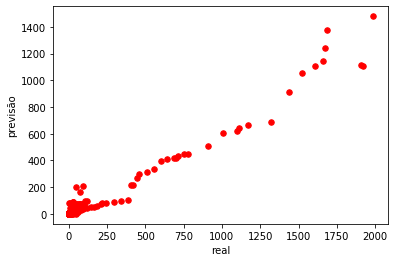

In [136]:
plt.scatter(df_mortes_teste_lasso['real'], df_mortes_teste_lasso['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [137]:
df_mortes_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,5.53411,4.07084
std,67.05556,44.00049
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1986.00000,1480.00000


Com log1p:

*  	real 	previsão
* count 	8794.00000 	8794.00000
* count 	8794.00000 	8794.00000
* mean 	5.53411 	4.07084
* std 	67.05556 	44.00049
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1986.00000 	1480.00000

In [138]:
df_mortes_teste_lasso[df_mortes_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [139]:
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Árvore de Decisão Com Modificação da Distr. Target (laço)'] = check_erro(df_mortes_teste_lasso['real'],
                                                                df_mortes_teste_lasso['previsão'])

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [140]:
erro_teste

,Baseline,Árvore de Decisão Com Modificação da Distr. Target (laço)
Base Teste,,
VIÉS,0.36453,1.46327
MSE,21.03945,616.10530
RMSE,4.58688,24.82147
MAE,0.38204,1.76461
MAPE,nan,inf


Com log1p:
*  	Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.36453 	1.46327
* MSE 	21.03945 	616.10530
* RMSE 	4.58688 	24.82147
* MAE 	0.38204 	1.76461
* MAPE 	nan 	inf

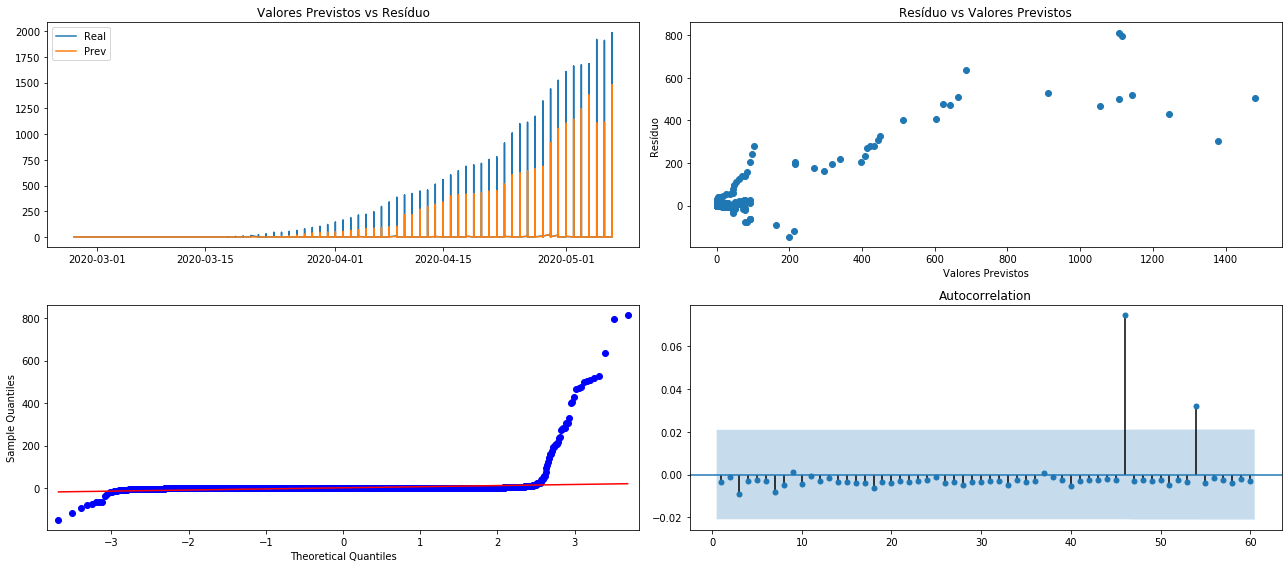

In [141]:
plotar_erro(df_mortes_teste_lasso)

* Com árvore de decisão com GridSearch com modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. Com a base teste, a árvore de decisão com GridSearch  teve desempenho pouco pior que a baseline, pior que a árvore de decisão sem GridSearch, mas muito melhor do que a regressão linear. O erro médio absoluto foi de 1.76 mortes, contra 0.38 mortes na baseline. Na comparação com a árvore sem modificação da target, a média das previsões todos os indicadores pioraram.


## 2.2. Método de Previsão Tradicional

### 2.2.1. Separando as bases de teste e de treino

In [142]:
explicativas

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,18,128,5,6638,-22.07300,-50.30800,0.73200,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,278,8
8791,40,128,5,35653,-22.54900,-47.91400,0.75500,12,4,4,2,0,0,20,36,8,2,0,0,0.53000,27,28,26,26,26,24,17,6,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,341,10
8792,21,128,5,6357,-23.13400,-49.05400,0.68500,0,0,0,0,0,0,3,5,4,0,0,0,0.53000,10,10,10,10,10,10,9,9,9,9,9,9,9,9,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,1,0,0,0,1,14,3
8793,36,128,5,18705,-22.47600,-46.63300,0.74500,1,7,2,2,0,0,3,15,6,6,0,0,0.53000,4,4,4,4,4,4,4,4,5,3,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,380,4


In [143]:
len(explicativas)*0.8

7036.0

In [144]:
explicativas.iloc[7036]

dias_epidemiológicos             7.00000
dia_do_ano                     124.00000
mês                              5.00000
habitantes                   21496.00000
lat                            -21.35900
                                 ...    
faixa_pop_Maior de 100 mil       0.00000
faixa_pop_Maior de 50 mil        0.00000
faixa_pop_Menor de 10 mil        0.00000
LE_munuf                       269.00000
LE_Nome_Mesorregião             12.00000
Name: 7036, Length: 59, dtype: float64

In [145]:
explicativas[explicativas['dia_do_ano']<125]

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,11,124,5,36305,-22.05900,-46.97900,0.71500,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,14,14,15,13,13,1,1,1,1,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,4
7360,31,124,5,35292,-21.34000,-47.72900,0.75600,1,1,0,0,0,0,3,10,0,0,0,0,0.53000,8,8,8,8,8,8,8,8,8,7,7,7,6,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,87,12
7361,19,124,5,69116,-20.28400,-50.24600,0.79700,15,17,9,5,0,5,21,49,7,7,0,0,0.53000,10,10,10,9,9,9,8,8,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,107,13
7362,53,124,5,194276,-23.54100,-46.36900,0.73800,0,0,0,0,0,0,60,80,29,27,11,2,0.61000,103,98,98,95,86,75,74,67,62,60,59,58,55,56,6,6,6,6,5,3,3,3,3,3,3,3,2,2,0,0,0,0,0,1,1,0,0,108,9


#### 2.2.1.1. Casos acumulados

##### Sem modificação da distribuição target

In [146]:
x_treino1 = expl_casos[explicativas['dia_do_ano']<125]
x_teste1 = expl_casos[explicativas['dia_do_ano']>=125]
y_treino1 = target_casos[dados_sel['dia_do_ano']<125]
y_teste1 = target_casos[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [147]:
x_treino1.shape

(7364, 53)

In [148]:
y_treino1.shape

(7364,)

##### Com modificação da distribuição target

In [149]:
y_treino1log = target_casos_log[dados_sel['dia_do_ano']<125]
y_teste1log = target_casos_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [150]:
y_treino1log.shape

(7364,)

#### 2.2.1.2. Mortes acumuladas

##### Sem modificação da distribuição target

In [151]:
x_treino2 = expl_mortes[explicativas['dia_do_ano']<125]
x_teste2 = expl_mortes[explicativas['dia_do_ano']>=125]
y_treino2 = target_mortes[dados_sel['dia_do_ano']<125]
y_teste2 = target_mortes[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [152]:
x_treino2.shape

(7364, 47)

In [153]:
y_treino2.shape

(7364,)

##### Com modificação da distribuição target

In [154]:
y_treino2log = target_mortes_log[dados_sel['dia_do_ano']<125]
y_teste2log = target_mortes_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [155]:
y_treino2log.shape

(7364,)

### 2.2.2. Árvore de Decisão

#### 2.2.2.1. Casos Acumulados

##### Sem modificação da distribuição target

In [156]:
tree = DecisionTreeRegressor(random_state=14)

In [157]:
grid_tree = {'criterion':["mse", "friedman_mse", "mae"],
             'splitter':["best", "random"],
             'max_depth':[None, 10, 20, 50, 100],
             'min_samples_split':[2],
             'min_samples_leaf':[1, 10, 50, 100],
             'min_weight_fraction_leaf':[0.0, 0.1, 0.5],
             'max_features':["auto", "sqrt", "log2", None],
             'random_state':[14],
             #'max_leaf_nodes':[None,10,20,30,50,100],
             #'min_impurity_decrease':[0.0,0.1,0.5,1.0],             
             'ccp_alpha':[0.0,0.5,1.0]
            }

In [158]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [159]:
grid_tree_treino = GridSearchCV(estimator=tree,
                                param_grid=grid_tree,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_tree_treino.fit(x_treino1, y_treino1)

Fitting 2 folds for each of 4320 candidates, totalling 8640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 23.6min finished


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=14),
             param_grid={'ccp_alpha': [0.0, 0.5, 1.0],
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 50, 100],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
                         'random_state': [14], 'splitter': ['best', 'random']},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [160]:
grid_tree_treino.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 14,
 'splitter': 'random'}

In [161]:
grid_tree_best = grid_tree_treino.best_estimator_

In [162]:
y_pred1 = grid_tree_best.predict(x_treino1)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])

In [163]:
df_casos_TREE_treino = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_treino = df_casos_TREE_treino.iloc[0:7364]
df_casos_TREE_treino = pd.concat([df_casos_TREE_treino,y_pred1], axis=1, join='inner')
df_casos_TREE_treino.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_treino.rename(columns=colunas, inplace=True)
df_casos_TREE_treino

,real,previsão
data,,
2020-02-26,1,1.00000
2020-02-27,1,1.00000
2020-02-28,1,1.00000
2020-02-29,1,1.00000
2020-03-01,1,1.00000
...,...,...
2020-05-03,14,14.00000
2020-05-03,8,8.00000
2020-05-03,10,10.00000


Text(0, 0.5, 'previsão')

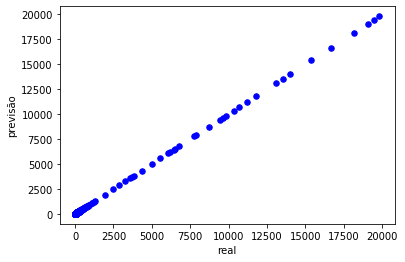

In [164]:
plt.scatter(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [165]:
df_casos_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,65.09791,64.99090
std,723.44974,723.45868
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,11.00000,11.00000
max,19822.00000,19822.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	65.09791 	64.99090
* std 	723.44974 	723.45868
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	11.00000 	11.00000
* max 	19822.00000 	19822.00000

In [166]:
df_casos_TREE_treino[df_casos_TREE_treino['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [167]:
df_casos_baseline_treino = df_casos.iloc[0:7364]
erro_treino = check_erro(df_casos_baseline_treino['real'].values,
                         df_casos_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Árvore de Decisão Sem Modificação da Distr. Target'] = check_erro(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'])
erro_treino

,Baseline,Árvore de Decisão Sem Modificação da Distr. Target
Base Treino,,
VIÉS,4.31545,0.10701
MSE,2087.44337,0.39455
RMSE,45.68855,0.62814
MAE,4.41214,0.14001
MAPE,11.90706,3.53618


#### Erro Treino
*  	Baseline 	Árvore de Decisão Sem Modificação da Distr. Target
* Base Treino 		
* VIÉS 	4.31545 	0.10701
* MSE 	2087.44337 	0.39455
* RMSE 	45.68855 	0.62814
* MAE 	4.41214 	0.14001
* MAPE 	11.90706 	3.53618

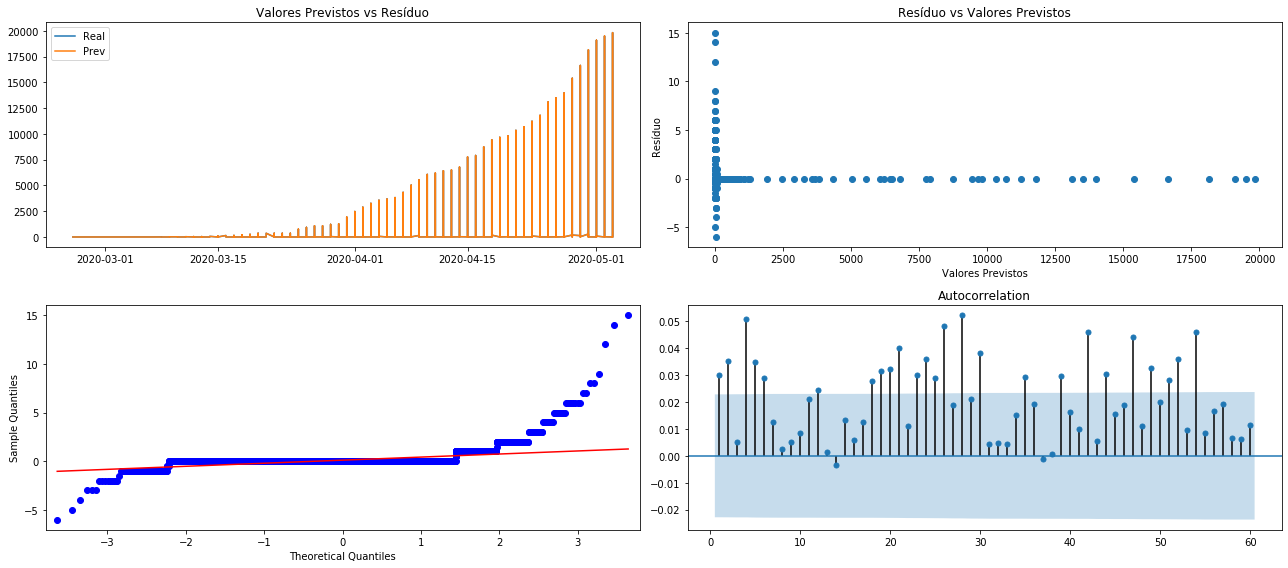

In [168]:
plotar_erro(df_casos_TREE_treino)

Com a base treino, a árvore de decisão com GridSearch sem modificação da distribuição target teve ótima performance sem dar overfit total. O erro absoluto médio foi de 0.14 contra 4.41 da baseline.

In [169]:
y_pred2 = grid_tree_best.predict(x_teste1)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])

In [170]:
df_casos_TREE_teste = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_teste = df_casos_TREE_teste.iloc[7364:]
df_casos_TREE_teste.reset_index(drop=True, inplace=True)
df_casos_TREE_teste = pd.concat([df_casos_TREE_teste,y_pred2], axis=1, join='inner')
df_casos_TREE_teste.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_teste.rename(columns=colunas, inplace=True)
df_casos_TREE_teste

,real,previsão
data,,
2020-05-04,4,4.00000
2020-05-04,1,1.00000
2020-05-04,236,286.00000
2020-05-04,14,14.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,2,2.00000
2020-05-07,36,27.00000
2020-05-07,10,10.00000


Text(0, 0.5, 'previsão')

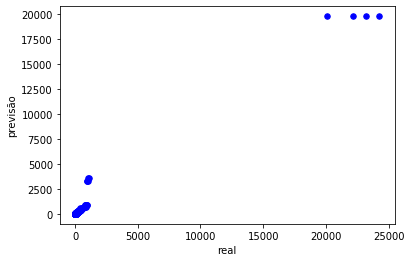

In [171]:
plt.scatter(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [172]:
df_casos_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,101.86723,102.95493
std,1191.41907,1067.84544
min,1.00000,1.00000
25%,2.00000,1.00000
50%,5.00000,5.00000
75%,19.00000,19.00000
max,24273.00000,19822.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	101.86723 	102.95493
* std 	1191.41907 	1067.84544
* min 	1.00000 	1.00000
* 25% 	2.00000 	1.00000
* 50% 	5.00000 	5.00000
* 75% 	19.00000 	19.00000
* max 	24273.00000 	19822.00000

In [173]:
df_casos_TREE_teste[df_casos_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [174]:
df_casos_baseline_teste = df_casos.iloc[7364:]
erro_teste = check_erro(df_casos_baseline_teste['real'].values,
                         df_casos_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Árvore de Decisão Sem Modificação da Distr. Target'] = check_erro(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'])
erro_teste

,Baseline,Árvore de Decisão Sem Modificação da Distr. Target
Base Teste,,
VIÉS,5.69602,-1.08770
MSE,4835.93082,45650.44532
RMSE,69.54086,213.65965
MAE,5.92383,18.80957
MAPE,11.07093,13.17174


#### Erro Teste
*  	Baseline 	Árvore de Decisão Sem Modificação da Distr. Target
* Base Teste 		
* VIÉS 	5.69602 	-1.08770
* MSE 	4835.93082 	45650.44532
* RMSE 	69.54086 	213.65965
* MAE 	5.92383 	18.80957
* MAPE 	11.07093 	13.17174

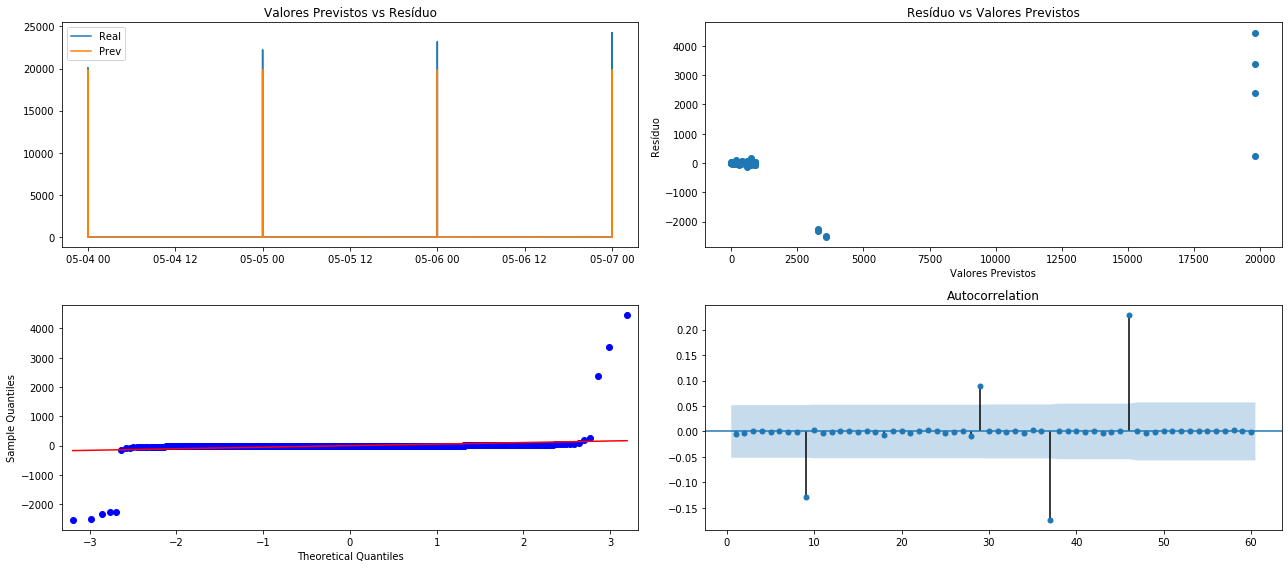

In [175]:
plotar_erro(df_casos_TREE_teste)

Com a base teste, a árvore de decisão com GridSearch sem modificação da distribuição target teve desempenho pior que a baseline, e equivalente à árvore de decisão sem GridSearch. O erro médio absoluto foi de 18.8, contra 16.4 casos na árvore de decisão sem GridSearch, contra 5.9 casos na baseline (que apenas repete o resultado do dia anterior). Porém, Viés, MSE, RMSE e MAPE tiveram performance melhor na árvore com GridSearch. A principal causa são os outliers da capital, como dão a entender o RMSE e o gráfico de dispersão.


##### Com modificação da distribuição target

In [176]:
tree = DecisionTreeRegressor(random_state=14)

In [177]:
grid_tree = {'criterion':["mse", "friedman_mse", "mae"],
             'splitter':["best", "random"],
             'max_depth':[None, 10, 20, 50, 100],
             'min_samples_split':[2],
             'min_samples_leaf':[1, 10, 50, 100],
             'min_weight_fraction_leaf':[0.0, 0.1, 0.5],
             'max_features':["auto", "sqrt", "log2", None],
             'random_state':[14],
             #'max_leaf_nodes':[None,10,20,30,50,100],
             #'min_impurity_decrease':[0.0,0.1,0.5,1.0],             
             'ccp_alpha':[0.0,0.5,1.0]
            }

In [178]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [179]:
grid_tree_treino = GridSearchCV(estimator=tree,
                                param_grid=grid_tree,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_tree_treino.fit(x_treino1, y_treino1log)

Fitting 2 folds for each of 4320 candidates, totalling 8640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 17.6min finished


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=14),
             param_grid={'ccp_alpha': [0.0, 0.5, 1.0],
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 50, 100],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
                         'random_state': [14], 'splitter': ['best', 'random']},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [180]:
grid_tree_treino.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 14,
 'splitter': 'best'}

In [181]:
grid_tree_best = grid_tree_treino.best_estimator_

In [182]:
y_pred1 = grid_tree_best.predict(x_treino1)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [183]:
df_casos_TREE_treino = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_treino = df_casos_TREE_treino.iloc[0:7364]
df_casos_TREE_treino = pd.concat([df_casos_TREE_treino,y_pred1], axis=1, join='inner')
df_casos_TREE_treino.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_treino.rename(columns=colunas, inplace=True)
df_casos_TREE_treino

,real,previsão
data,,
2020-02-26,1,1.00000
2020-02-27,1,1.00000
2020-02-28,1,1.00000
2020-02-29,1,1.00000
2020-03-01,1,1.00000
...,...,...
2020-05-03,14,14.00000
2020-05-03,8,8.00000
2020-05-03,10,11.00000


Text(0, 0.5, 'previsão')

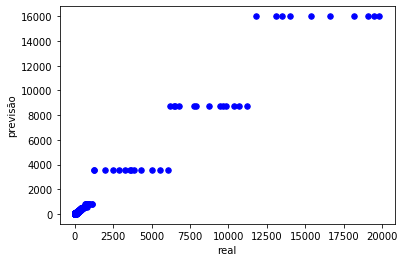

In [184]:
plt.scatter(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [185]:
df_casos_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,65.09791,64.98180
std,723.44974,711.31583
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,11.00000,11.00000
max,19822.00000,16005.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	65.09791 	64.98180
* std 	723.44974 	711.31583
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	11.00000 	11.00000
* max 	19822.00000 	16005.00000

In [186]:
df_casos_TREE_treino[df_casos_TREE_treino['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [187]:
df_casos_baseline_treino = df_casos.iloc[0:7364]
erro_treino = check_erro(df_casos_baseline_treino['real'].values,
                         df_casos_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Árvore de Decisão Com Modificação da Distr. Target'] = check_erro(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'])
erro_treino

,Baseline,Árvore de Decisão Com Modificação da Distr. Target
Base Treino,,
VIÉS,4.31545,0.11611
MSE,2087.44337,19536.80758
RMSE,45.68855,139.77413
MAE,4.41214,9.60117
MAPE,11.90706,7.17381


#### Erro Treino
*  	Baseline 	Árvore de Decisão Com Modificação da Distr. Target
* Base Treino 		
* VIÉS 	4.31545 	0.11611
* MSE 	2087.44337 	19536.80758
* RMSE 	45.68855 	139.77413
* MAE 	4.41214 	9.60117
* MAPE 	11.90706 	7.17381

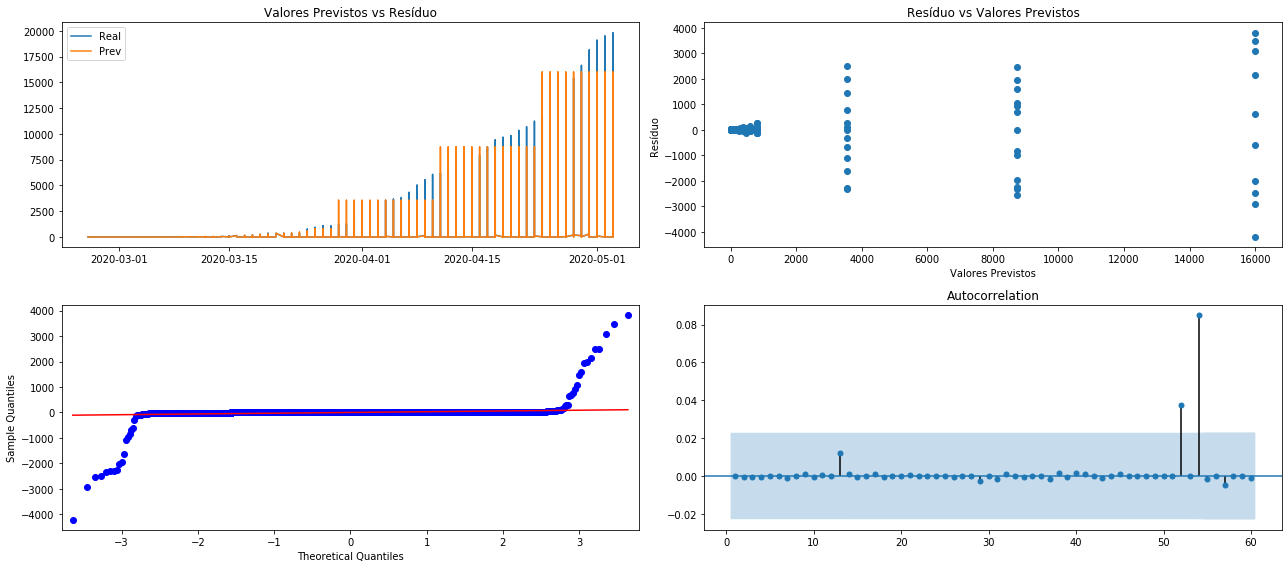

In [188]:
plotar_erro(df_casos_TREE_treino)

Com a base treino, a árvore de decisão com modificação da distribuição target e GridSearch não deu overfit, como na árvore sem GridSearch, mas a previsão não criou uma curva e sim 3 patamares, invalidando o modelo.

In [189]:
y_pred2 = grid_tree_best.predict(x_teste1)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [190]:
df_casos_TREE_teste = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_teste = df_casos_TREE_teste.iloc[7364:]
df_casos_TREE_teste.reset_index(drop=True, inplace=True)
df_casos_TREE_teste = pd.concat([df_casos_TREE_teste,y_pred2], axis=1, join='inner')
df_casos_TREE_teste.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_teste.rename(columns=colunas, inplace=True)
df_casos_TREE_teste

,real,previsão
data,,
2020-05-04,4,4.00000
2020-05-04,1,1.00000
2020-05-04,236,234.00000
2020-05-04,14,14.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,2,2.00000
2020-05-07,36,29.00000
2020-05-07,10,11.00000


Text(0, 0.5, 'previsão')

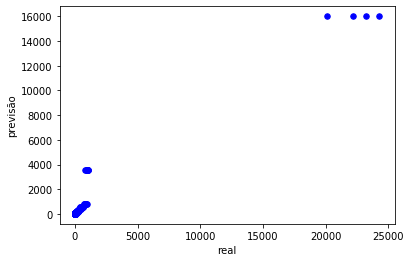

In [191]:
plt.scatter(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [192]:
df_casos_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,101.86723,98.03983
std,1191.41907,887.60634
min,1.00000,1.00000
25%,2.00000,1.00000
50%,5.00000,5.00000
75%,19.00000,19.00000
max,24273.00000,16005.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* count 	1431.00000 	1431.00000
* mean 	101.86723 	98.03983
* std 	1191.41907 	887.60634
* min 	1.00000 	1.00000
* 25% 	2.00000 	1.00000
* 50% 	5.00000 	5.00000
* 75% 	19.00000 	19.00000
* max 	24273.00000 	16005.00000

In [193]:
df_casos_TREE_teste[df_casos_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [194]:
df_casos_baseline_teste = df_casos.iloc[7364:]
erro_teste = check_erro(df_casos_baseline_teste['real'].values,
                         df_casos_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Árvore de Decisão Com Modificação da Distr. Target'] = check_erro(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'])
erro_teste

,Baseline,Árvore de Decisão Com Modificação da Distr. Target
Base Teste,,
VIÉS,5.69602,3.82739
MSE,4835.93082,160320.20196
RMSE,69.54086,400.40005
MAE,5.92383,35.25017
MAPE,11.07093,10.66033


#### Erro Teste
*  	Baseline 	Árvore de Decisão Com Modificação da Distr. Target
* Base Teste 		
* VIÉS 	5.69602 	3.82739
* MSE 	4835.93082 	160320.20196
* RMSE 	69.54086 	400.40005
* MAE 	5.92383 	35.25017
* MAPE 	11.07093 	10.66033

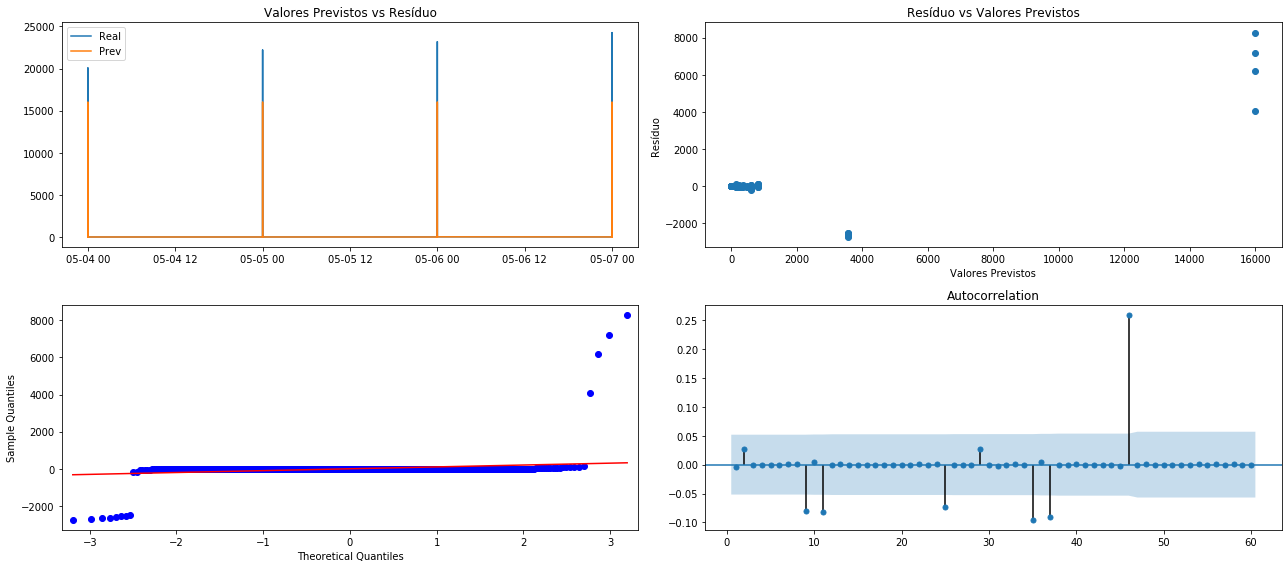

In [195]:
plotar_erro(df_casos_TREE_teste)

Com a base teste, a árvore de decisão com modificação da distribuição target e GridSearch teve desempenho pior que a baseline e que a árvore sem GridSearch. O erro médio absoluto foi de 35.25 casos, contra 20.5 casos da árvore de decisão sem GridSearch, contra 5.9 casos na baseline (que apenas repete o resultado do dia anterior). Em comparação com a árvore sem modificação da distribuição target e GridSearch, vemos que houve piora em todos os indicadores

#### 2.2.2.2. Mortes Acumuladas

##### Sem modificação da distribuição target

In [196]:
tree = DecisionTreeRegressor(random_state=14)

In [197]:
grid_tree = {'criterion':["mse", "friedman_mse", "mae"],
             'splitter':["best", "random"],
             'max_depth':[None, 10, 20, 50, 100],
             'min_samples_split':[2],
             'min_samples_leaf':[1, 10, 50, 100],
             'min_weight_fraction_leaf':[0.0, 0.1, 0.5],
             'max_features':["auto", "sqrt", "log2", None],
             'random_state':[14],
             #'max_leaf_nodes':[None,10,20,30,50,100],
             #'min_impurity_decrease':[0.0,0.1,0.5,1.0],             
             'ccp_alpha':[0.0,0.5,1.0]
            }

In [198]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [199]:
grid_tree_treino = GridSearchCV(estimator=tree,
                                param_grid=grid_tree,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_tree_treino.fit(x_treino2,y_treino2)

Fitting 2 folds for each of 4320 candidates, totalling 8640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 17.3min finished


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=14),
             param_grid={'ccp_alpha': [0.0, 0.5, 1.0],
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 50, 100],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
                         'random_state': [14], 'splitter': ['best', 'random']},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [200]:
grid_tree_treino.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 14,
 'splitter': 'best'}

In [201]:
grid_tree_best = grid_tree_treino.best_estimator_

In [202]:
y_pred1 = grid_tree_best.predict(x_treino2)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])

In [203]:
df_mortes_TREE_treino = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_treino = df_mortes_TREE_treino.iloc[0:7364]
df_mortes_TREE_treino = pd.concat([df_mortes_TREE_treino,y_pred1], axis=1, join='inner')
df_mortes_TREE_treino.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_treino.rename(columns=colunas, inplace=True)
df_mortes_TREE_treino

,real,previsão
data,,
2020-02-26,0,0.07000
2020-02-27,0,0.07000
2020-02-28,0,0.07000
2020-02-29,0,0.07000
2020-03-01,0,0.07000
...,...,...
2020-05-03,2,2.07353
2020-05-03,1,1.01654
2020-05-03,0,0.09756


Text(0, 0.5, 'previsão')

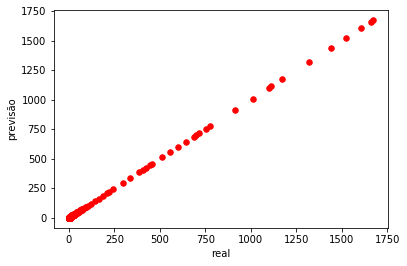

In [204]:
plt.scatter(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [205]:
df_mortes_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,4.98669,4.98669
std,58.68772,58.68685
min,0.00000,0.02468
25%,0.00000,0.02468
50%,0.00000,0.02468
75%,1.00000,1.08259
max,1673.00000,1673.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	4.98669 	4.98669
* std 	58.68772 	58.68685
* min 	0.00000 	0.02468
* 25% 	0.00000 	0.02468
* 50% 	0.00000 	0.02468
* 75% 	1.00000 	1.08259
* max 	1673.00000 	1673.00000

In [206]:
df_mortes_TREE_treino[df_mortes_TREE_treino['previsão'] < 0]

,real,previsão
data,,


Regressão linear sem polinômio:
* sem previsões negativas

In [207]:
df_mortes_baseline_treino = df_mortes.iloc[0:7364]
erro_treino = check_erro(df_mortes_baseline_treino['real'].values,
                         df_mortes_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Árvore de Decisão Sem Modificação da Distr. Target'] = check_erro(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'])
erro_treino

,Baseline,Árvore de Decisão Sem Modificação da Distr. Target
Base Treino,,
VIÉS,0.35646,0.00000
MSE,16.43061,0.10213
RMSE,4.05347,0.31958
MAE,0.36353,0.12633
MAPE,9.64655,inf


#### Erro Treino
*  	Baseline 	Regressão Linear ScikitLearn
* Base Treino 		
* VIÉS 	0.35646 	0.00000
* MSE 	16.43061 	0.10213
* RMSE 	4.05347 	0.31958
* MAE 	0.36353 	0.12633
* MAPE 	9.64655 	inf

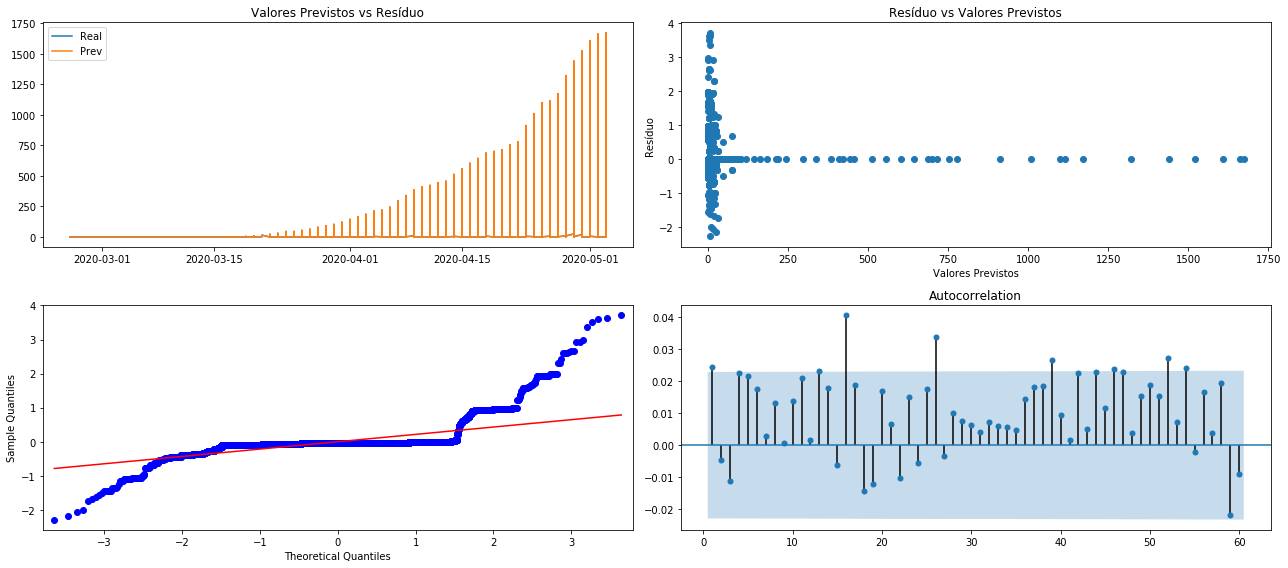

In [208]:
plotar_erro(df_mortes_TREE_treino)

Com a base treino, a árvore de decisão sem modificação da distribuição target e com GridSearch não deu overfit, e apresentou métricas melhores que a baseline.

In [209]:
y_pred2 = grid_tree_best.predict(x_teste2)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])

In [210]:
df_mortes_TREE_teste = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_teste = df_mortes_TREE_teste.iloc[7364:]
df_mortes_TREE_teste.reset_index(drop=True, inplace=True)
df_mortes_TREE_teste = pd.concat([df_mortes_TREE_teste,y_pred2], axis=1, join='inner')
df_mortes_TREE_teste.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_teste.rename(columns=colunas, inplace=True)
df_mortes_TREE_teste

,real,previsão
data,,
2020-05-04,0,0.02468
2020-05-04,0,0.02468
2020-05-04,11,13.33333
2020-05-04,3,3.06218
2020-05-04,1,1.01654
...,...,...
2020-05-07,0,0.02468
2020-05-07,0,0.09756
2020-05-07,2,2.07353


Text(0, 0.5, 'previsão')

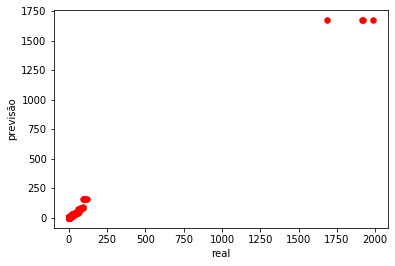

In [211]:
plt.scatter(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [212]:
df_mortes_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,8.34731,8.04512
std,99.52253,89.04924
min,0.00000,0.02468
25%,0.00000,0.02468
50%,0.00000,0.09756
75%,2.00000,2.07353
max,1986.00000,1673.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* count 	1431.00000 	1431.00000
* mean 	8.34731 	8.04512
* std 	99.52253 	89.04924
* min 	0.00000 	0.02468
* 25% 	0.00000 	0.02468
* 50% 	0.00000 	0.09756
* 75% 	2.00000 	2.07353
* max 	1986.00000 	1673.00000

In [213]:
df_mortes_TREE_teste[df_mortes_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas.

In [214]:
df_mortes_baseline_teste = df_mortes.iloc[7364:]
erro_teste = check_erro(df_mortes_baseline_teste['real'].values,
                         df_mortes_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Árvore de Decisão Sem Modificação da Distr. Target'] = check_erro(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'])
erro_teste

,Baseline,Árvore de Decisão Sem Modificação da Distr. Target
Base Teste,,
VIÉS,0.40601,0.30219
MSE,44.75681,164.68100
RMSE,6.69005,12.83281
MAE,0.47729,1.13552
MAPE,6.72089,inf


#### Erro Treino
*  	Baseline 	Regressão Linear ScikitLearn
* Base Teste 		
* VIÉS 	0.40601 	0.30219
* MSE 	44.75681 	164.68100
* RMSE 	6.69005 	12.83281
* MAE 	0.47729 	1.13552
* MAPE 	6.72089 	inf

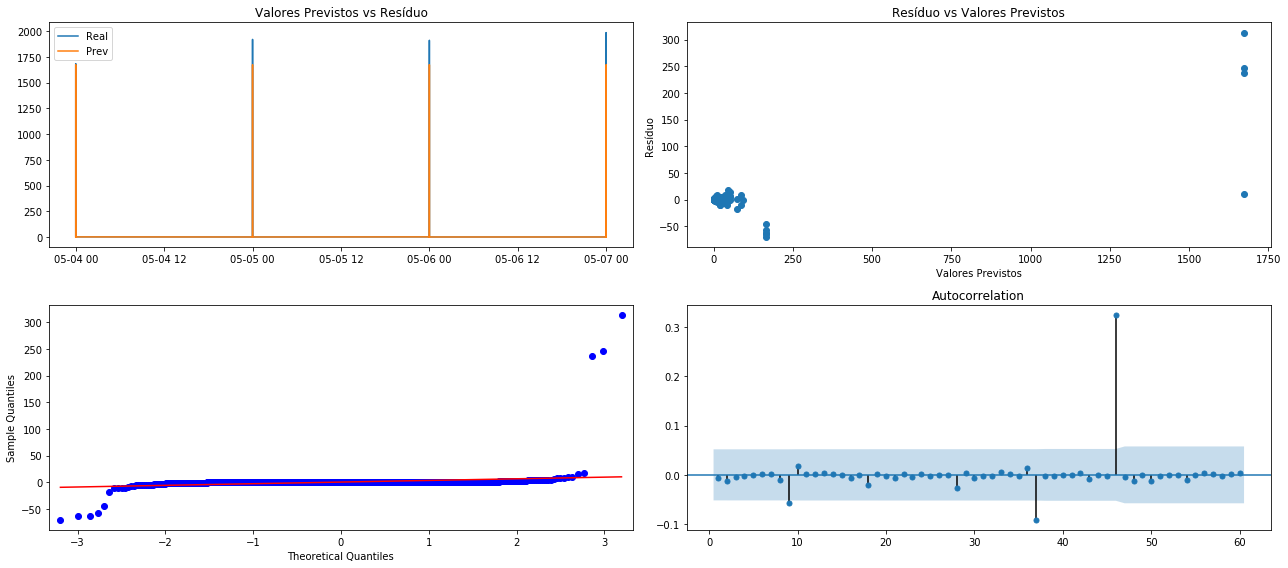

In [215]:
plotar_erro(df_mortes_TREE_teste)

Com a base teste, a árvore de decisão sem modificação da distribuição target e com GridSearch teve desempenho pior que a baseline, mas melhorou em relação à árvore sem GridSearch. O erro médio absoluto foi de 1.13 mortes, contra 1.24 mortes da árvore sem GridSearch, contra 0.47 mortes na baseline (que apenas repete o resultado do dia anterior). A principal causa são os outliers da capital, como dão a entender o RMSE e o gráfico de dispersão.


##### Com modificação da distribuição target

In [216]:
tree = DecisionTreeRegressor(random_state=14)

In [217]:
grid_tree = {'criterion':["mse", "friedman_mse", "mae"],
             'splitter':["best", "random"],
             'max_depth':[None, 10, 20, 50, 100],
             'min_samples_split':[2],
             'min_samples_leaf':[1, 10, 50, 100],
             'min_weight_fraction_leaf':[0.0, 0.1, 0.5],
             'max_features':["auto", "sqrt", "log2", None],
             'random_state':[14],
             #'max_leaf_nodes':[None,10,20,30,50,100],
             #'min_impurity_decrease':[0.0,0.1,0.5,1.0],             
             'ccp_alpha':[0.0,0.5,1.0]
            }

In [218]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [219]:
grid_tree_treino = GridSearchCV(estimator=tree,
                                param_grid=grid_tree,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_tree_treino.fit(x_treino2,y_treino2log)

Fitting 2 folds for each of 4320 candidates, totalling 8640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 15.1min finished


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=14),
             param_grid={'ccp_alpha': [0.0, 0.5, 1.0],
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 50, 100],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
                         'random_state': [14], 'splitter': ['best', 'random']},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [220]:
grid_tree_treino.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 14,
 'splitter': 'best'}

In [221]:
grid_tree_best = grid_tree_treino.best_estimator_

In [222]:
y_pred1 = grid_tree_best.predict(x_treino2)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [223]:
df_mortes_TREE_treino = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_treino = df_mortes_TREE_treino.iloc[0:7364]
df_mortes_TREE_treino = pd.concat([df_mortes_TREE_treino,y_pred1], axis=1, join='inner')
df_mortes_TREE_treino.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_treino.rename(columns=colunas, inplace=True)
df_mortes_TREE_treino

,real,previsão
data,,
2020-02-26,0,0.00000
2020-02-27,0,0.00000
2020-02-28,0,0.00000
2020-02-29,0,0.00000
2020-03-01,0,0.00000
...,...,...
2020-05-03,2,2.00000
2020-05-03,1,1.00000
2020-05-03,0,0.00000


Text(0, 0.5, 'previsão')

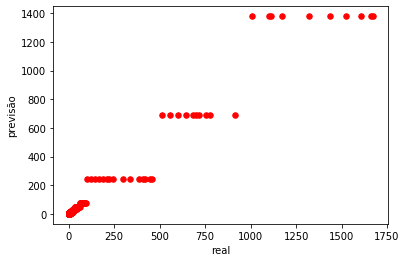

In [224]:
plt.scatter(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [225]:
df_mortes_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,4.98669,4.88145
std,58.68772,57.99532
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1673.00000,1379.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* count 	7364.00000 	7364.00000
* mean 	4.98669 	4.88145
* std 	58.68772 	57.99532
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1673.00000 	1379.00000

In [226]:
df_mortes_TREE_treino[df_mortes_TREE_treino['previsão'] < 0]

,real,previsão
data,,


Regressão linear sem polinômio:
* sem previsões negativas

In [227]:
df_mortes_baseline_treino = df_mortes.iloc[0:7364]
erro_treino = check_erro(df_mortes_baseline_treino['real'].values,
                         df_mortes_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Árvore de Decisão Com Modificação da Distr. Target'] = check_erro(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'])
erro_treino

,Baseline,Árvore de Decisão Com Modificação da Distr. Target
Base Treino,,
VIÉS,0.35646,0.10524
MSE,16.43061,126.35565
RMSE,4.05347,11.24080
MAE,0.36353,0.77309
MAPE,9.64655,9.87686


#### Erro Treino
*  	Baseline 	Regressão Linear ScikitLearn
* Base Treino 		
* VIÉS 	0.35646 	0.10524
* MSE 	16.43061 	126.35565
* RMSE 	4.05347 	11.24080
* MAE 	0.36353 	0.77309
* MAPE 	9.64655 	9.87686

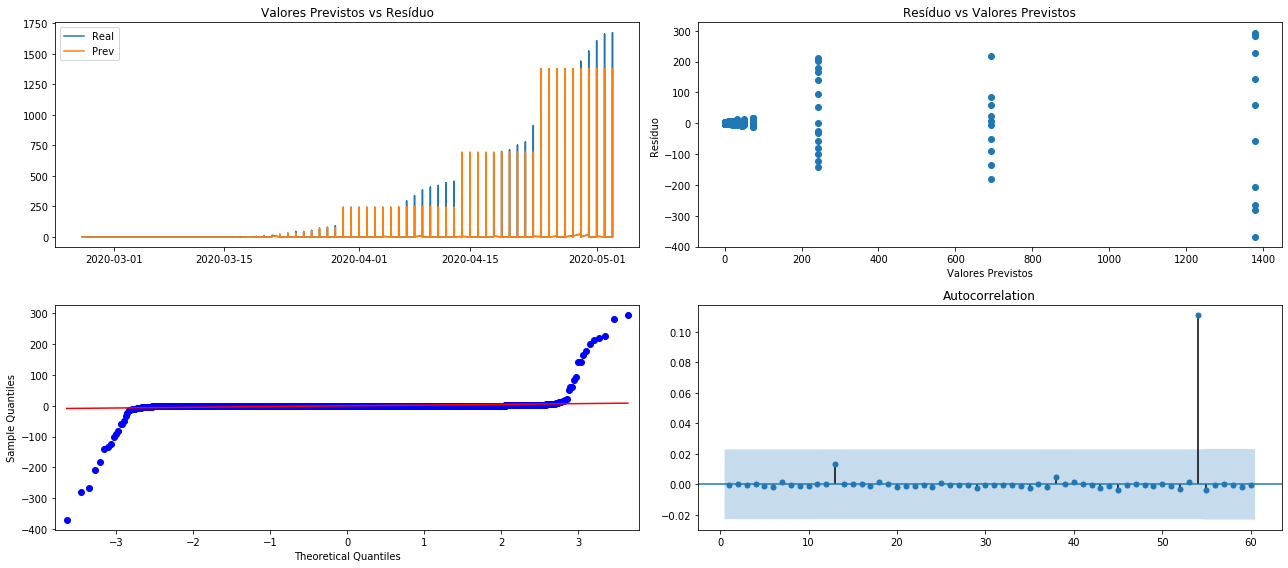

In [228]:
plotar_erro(df_mortes_TREE_treino)

Com a base treino, a árvore de decisão com modificação da distribuição target e GridSearch teve o mesmo comportamento quando lidou com casos: ao invés de projetar uma curva, criou 3 patamares de previsão, invalidando o modelo.

In [229]:
y_pred2 = grid_tree_best.predict(x_teste2)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [230]:
df_mortes_TREE_teste = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_teste = df_mortes_TREE_teste.iloc[7364:]
df_mortes_TREE_teste.reset_index(drop=True, inplace=True)
df_mortes_TREE_teste = pd.concat([df_mortes_TREE_teste,y_pred2], axis=1, join='inner')
df_mortes_TREE_teste.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_teste.rename(columns=colunas, inplace=True)
df_mortes_TREE_teste

,real,previsão
data,,
2020-05-04,0,0.00000
2020-05-04,0,0.00000
2020-05-04,11,12.00000
2020-05-04,3,3.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,0,0.00000
2020-05-07,0,0.00000
2020-05-07,2,2.00000


Text(0, 0.5, 'previsão')

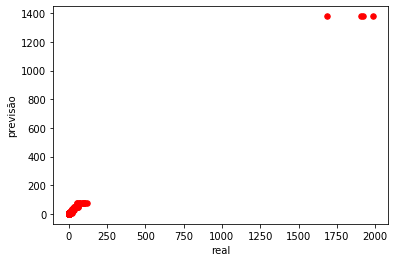

In [231]:
plt.scatter(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [232]:
df_mortes_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,8.34731,6.82600
std,99.52253,73.23434
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,2.00000,2.00000
max,1986.00000,1379.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	8.34731 	6.82600
* std 	99.52253 	73.23434
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	2.00000 	2.00000
* max 	1986.00000 	1379.00000

In [233]:
df_mortes_TREE_teste[df_mortes_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas.

In [234]:
df_mortes_baseline_teste = df_mortes.iloc[7364:]
erro_teste = check_erro(df_mortes_baseline_teste['real'].values,
                         df_mortes_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Árvore de Decisão Com Modificação da Distr. Target'] = check_erro(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'])
erro_teste

,Baseline,Árvore de Decisão Com Modificação da Distr. Target
Base Teste,,
VIÉS,0.40601,1.52131
MSE,44.75681,728.16981
RMSE,6.69005,26.98462
MAE,0.47729,1.79525
MAPE,6.72089,8.85452


#### Erro Teste
*  	Baseline 	Árvore de Decisão Com Modificação da Distr. Target
* Base Teste 		
* VIÉS 	0.40601 	1.52131
* MSE 	44.75681 	728.16981
* RMSE 	6.69005 	26.98462
* MAE 	0.47729 	1.79525
* MAPE 	6.72089 	8.85452

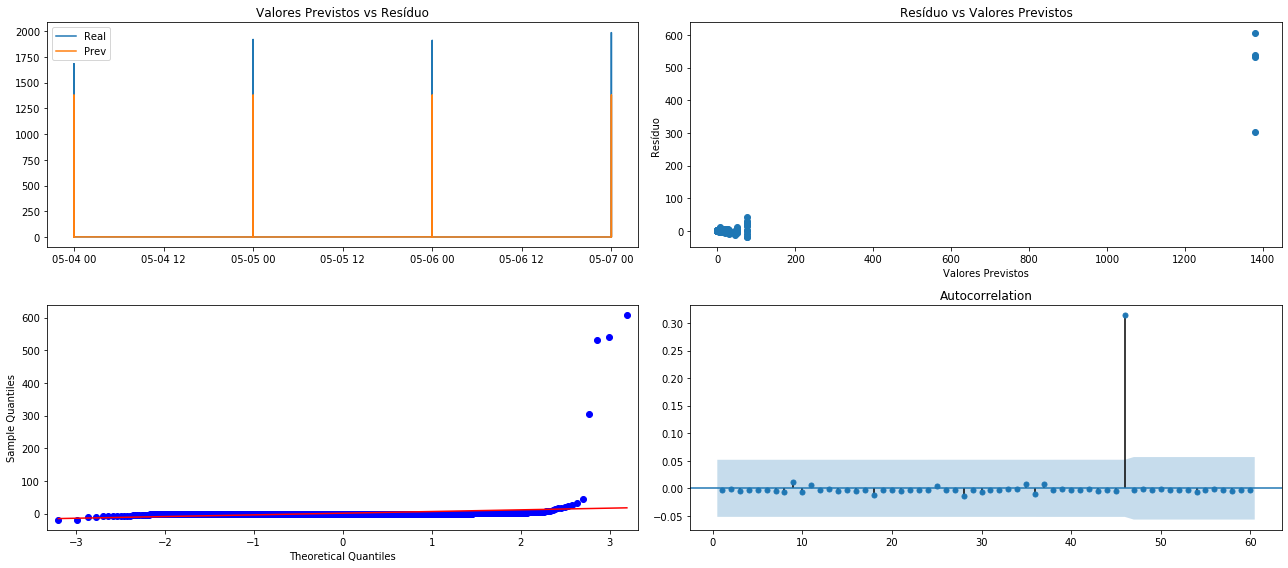

In [235]:
plotar_erro(df_mortes_TREE_teste)

Com a base teste, a árvore de decisão com modificação da distribuição target e GridSearch teve desempenho pior que a baseline e pior que a árvore sem GridSearch. O erro médio absoluto foi de 1.79 mortes, contra 1.03 mortes na árvore sem GridSearch, contra 0.47 mortes na baseline (que apenas repete o resultado do dia anterior).
